## about_dataset

In [1]:
import os
import librosa
import matplotlib.pyplot as plt

def get_audio_length_distribution(root_dir):
    distribution = {}

    # Traverse through the root directory
    for subdir, _, files in os.walk(root_dir):
        audio_lengths = []

        # Process each file in the subdirectory
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                try:
                    # Load the audio file
                    audio, sr = librosa.load(file_path, sr=None)
                    # Get the length of the audio in seconds
                    length = librosa.get_duration(y=audio, sr=sr)
                    audio_lengths.append(length)
                except Exception as e:
                    print(f"Could not process file {file_path}: {e}")

        if audio_lengths:
            # Store the distribution of audio lengths for this subfolder
            distribution[subdir] = audio_lengths
    
    return distribution

def plot_distribution(distribution):
    for subdir, lengths in distribution.items():
        plt.figure()
        plt.hist(lengths, bins=20, alpha=0.75, edgecolor='black')
        plt.title(f'Audio Length Distribution in {os.path.basename(subdir)}')
        plt.xlabel('Length (seconds)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [15]:
import os
import librosa

def get_audio_length_distribution(root_dir, threshold=30):
    distribution = {}

    # Traverse through the root directory
    for subdir, _, files in os.walk(root_dir):
        audio_info = {
            'count': 0,
            'total_duration': [],
            'file_names': []
        }

        # Process each file in the subdirectory
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                try:
                    # Load the audio file
                    audio, sr = librosa.load(file_path, sr=None)
                    # Get the length of the audio in seconds
                    length = librosa.get_duration(y=audio, sr=sr)
                    if length > threshold:
                        audio_info['count'] += 1
                        audio_info['total_duration'].append(length)
                        audio_info['file_names'].append(file)
                except Exception as e:
                    print(f"Could not process file {file_path}: {e}")

        if audio_info['count'] > 0:
            zipped_lists = zip(audio_info['total_duration'], audio_info['file_names'])

            # Sort the zipped lists based on the file names
            sorted_zipped_lists = sorted(zipped_lists, key=lambda x: x[0], reverse=True)

            # Unzip the sorted pairs back into two lists
            total_duration, file_names = zip(*sorted_zipped_lists)

            # Convert back to lists if needed
            audio_info['total_duration'] = list(total_duration)
            audio_info['file_names'] = list(file_names)
            # Store the information for this subfolder
            distribution[subdir] = audio_info
    
    return distribution

def print_distribution_info(distribution):
    for subdir, info in distribution.items():
        print(f"Folder: {os.path.basename(subdir)}")
        print(f"Number of files longer than 30 seconds: {info['count']}")
        print(f"Total duration of these files: {info['total_duration']:.2f} seconds")
        print("Files:")
        for file_name in info['file_names']:
            print(f"  - {file_name}")
        print()



In [16]:
# Root directory containing subfolders with audio files
root_dir = '/home/edu/data/datasets/PCCh23'

# Get the distribution of audio lengths
distribution = get_audio_length_distribution(root_dir)

Folder: Catalina_Salem_Gesell
Number of files longer than 30 seconds: 26


TypeError: unsupported format string passed to list.__format__

In [21]:
for folder in distribution:
    print(folder)

/home/edu/data/datasets/PCCh23/Catalina_Salem_Gesell
/home/edu/data/datasets/PCCh23/Paz_Anastasiadis_Le_Roy
/home/edu/data/datasets/PCCh23/Secretario_Carlos_Camara
/home/edu/data/datasets/PCCh23/Katherine_Denisse_Martorell_Awad
/home/edu/data/datasets/PCCh23/Sebastian_Parraguez_Gonzalez
/home/edu/data/datasets/PCCh23/Antonio_Barchiesi_Chavez
/home/edu/data/datasets/PCCh23/Hernan_Larrain_Fernandez
/home/edu/data/datasets/PCCh23/Alejandro_Kohler_Vargas
/home/edu/data/datasets/PCCh23/Diego_Vargas_Castillo
/home/edu/data/datasets/PCCh23/Lorena_Gallardo_Cardenas
/home/edu/data/datasets/PCCh23/Maria_Pardo_Vergara
/home/edu/data/datasets/PCCh23/Leslie_Sanchez_Lobos
/home/edu/data/datasets/PCCh23/Domingo_Lovera_Parmo
/home/edu/data/datasets/PCCh23/Ivon_Guerra_Aguilera
/home/edu/data/datasets/PCCh23/Maria_de_los_Angeles_Lopez_Porfiri
/home/edu/data/datasets/PCCh23/Maximo_Francisco_Pavez_Cantillano
/home/edu/data/datasets/PCCh23/Marcela_Araya_Sepulveda
/home/edu/data/datasets/PCCh23/Yerko_Ljubet

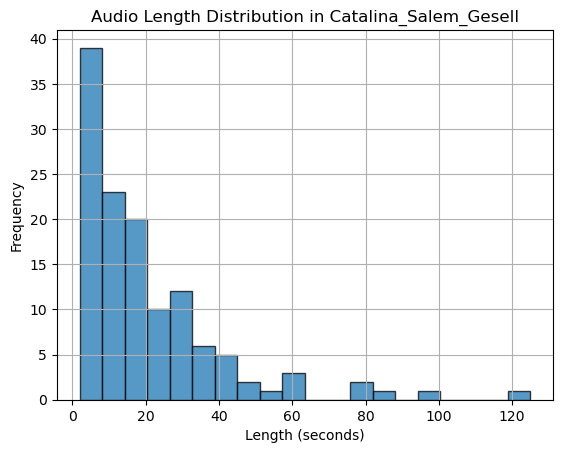

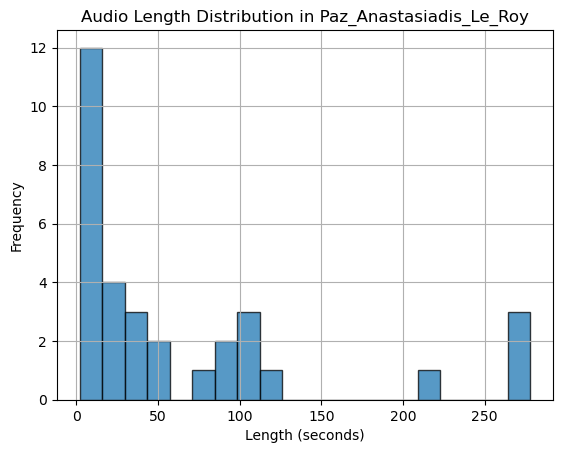

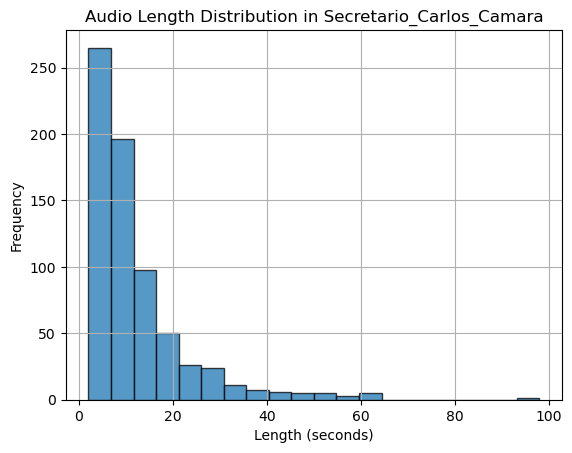

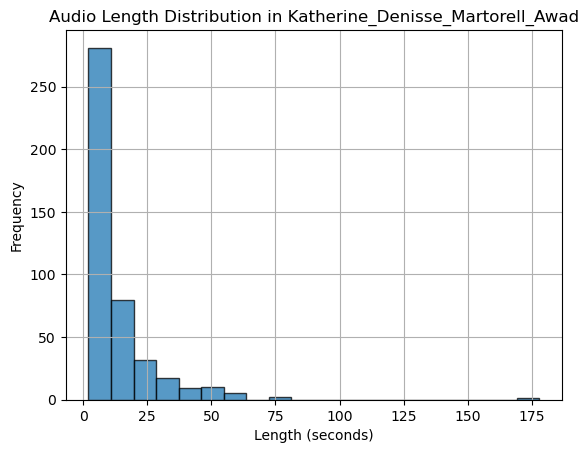

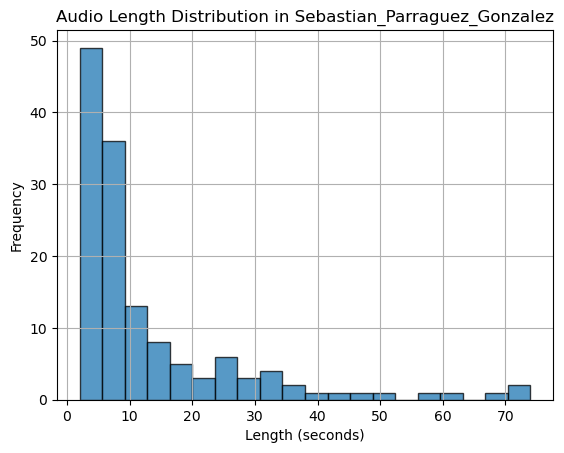

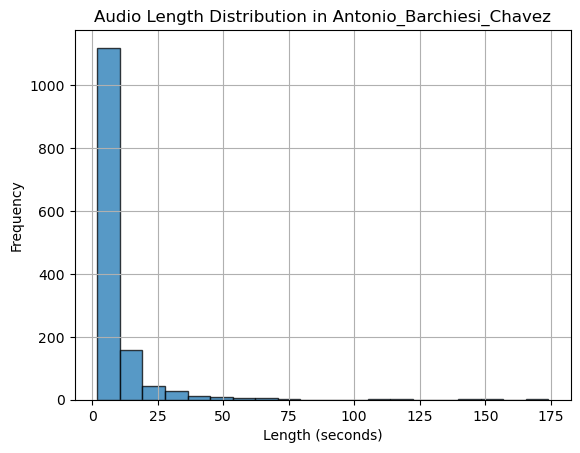

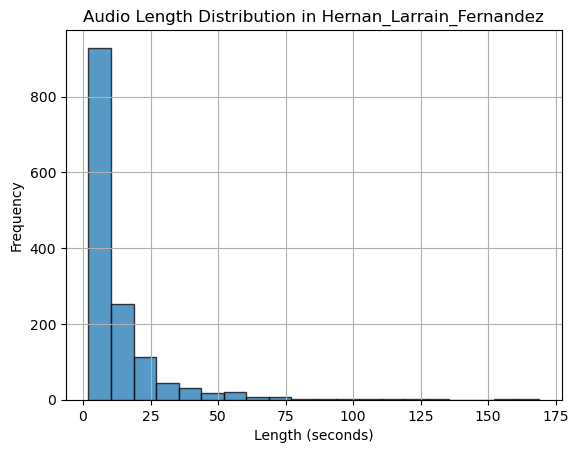

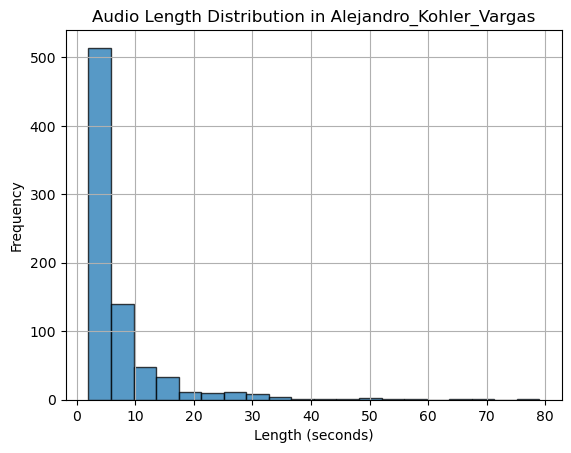

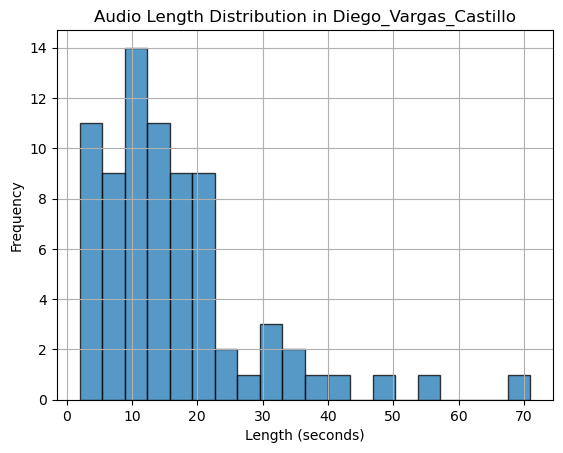

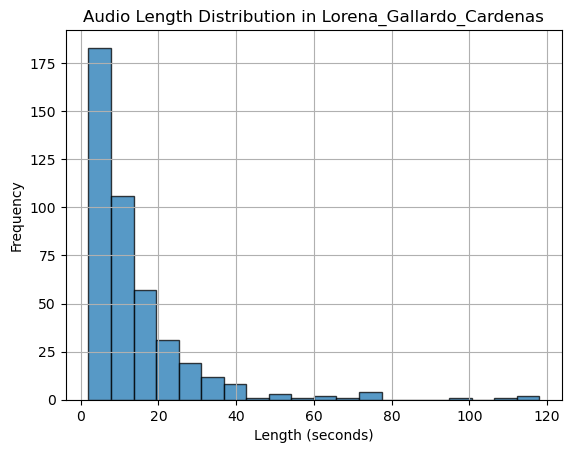

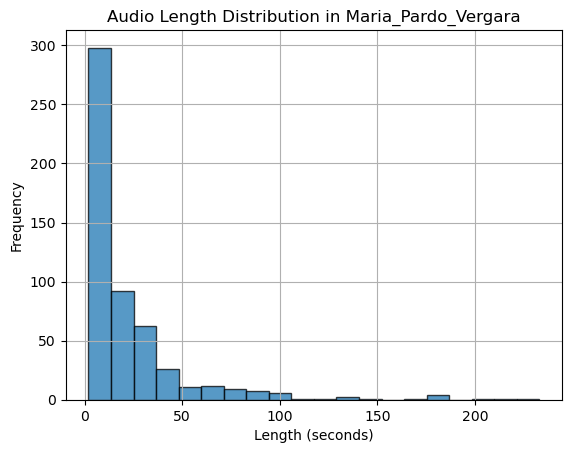

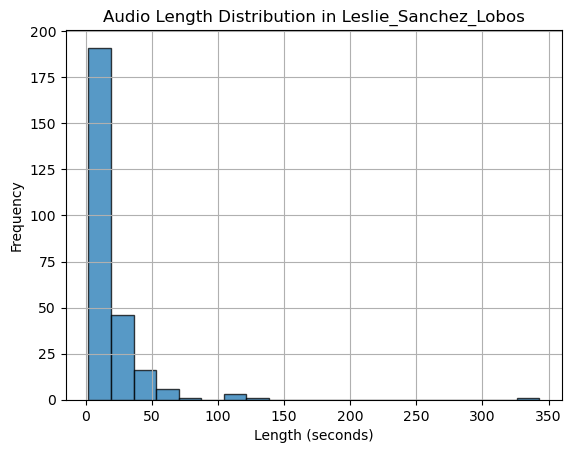

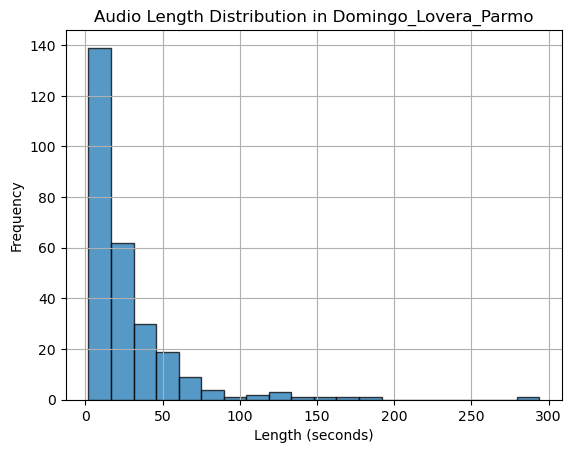

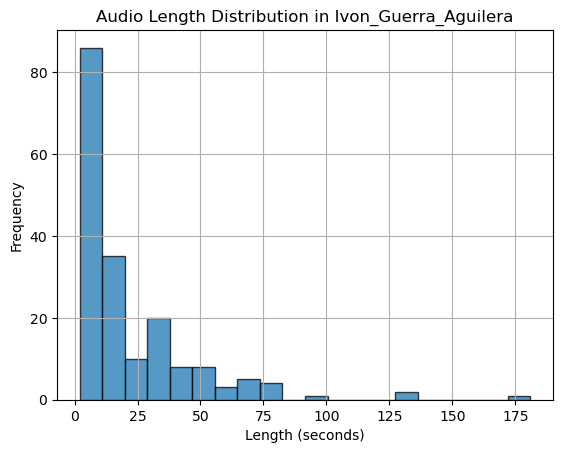

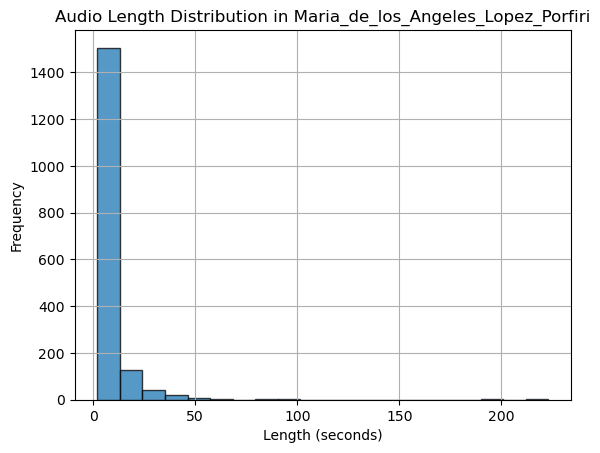

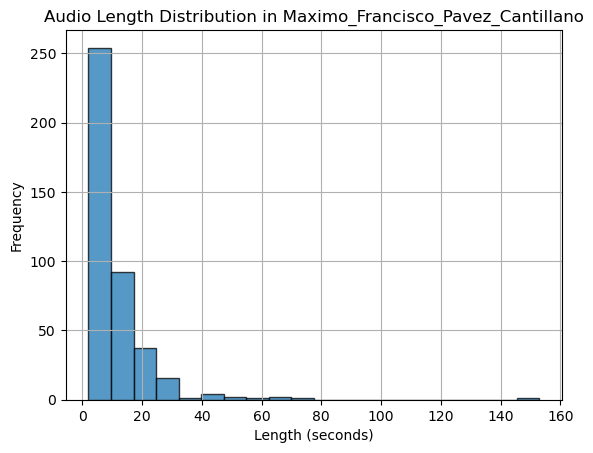

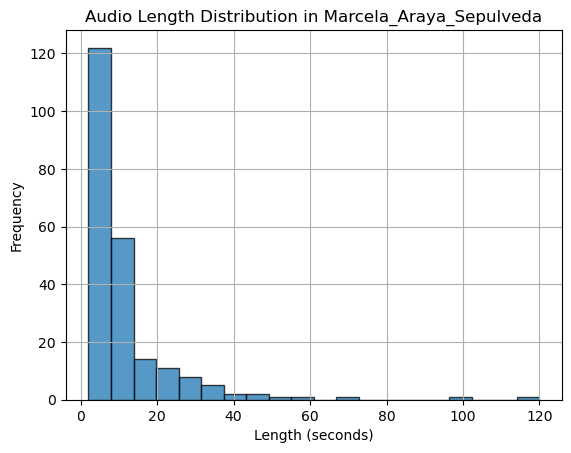

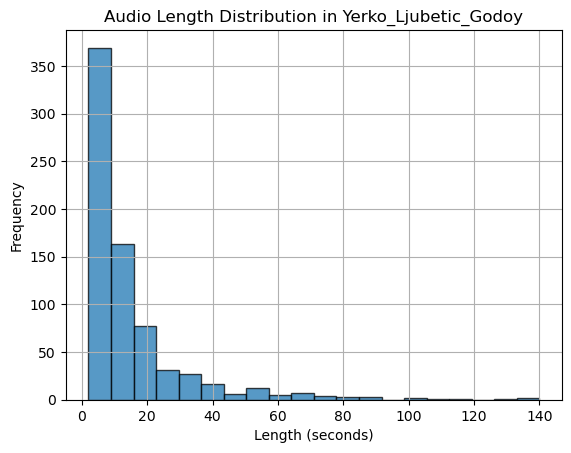

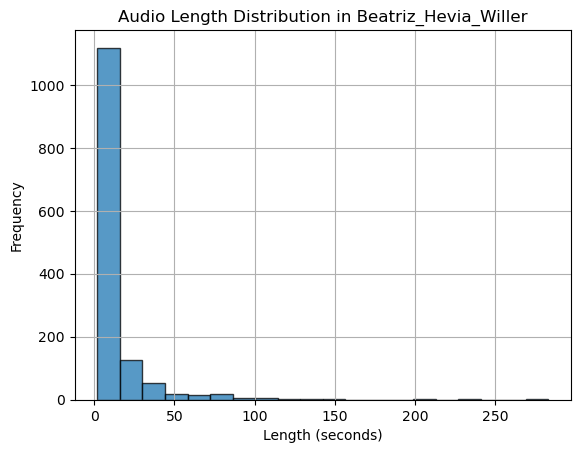

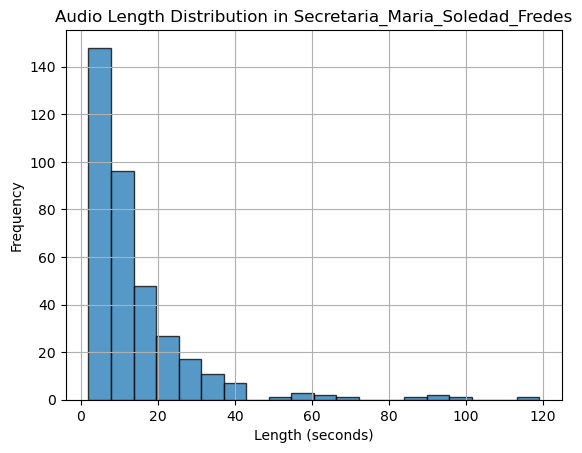

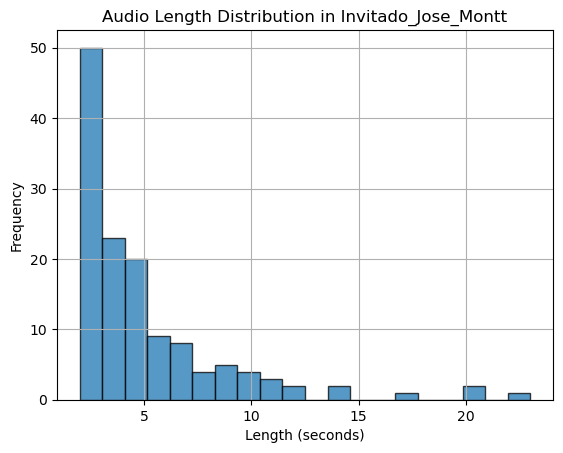

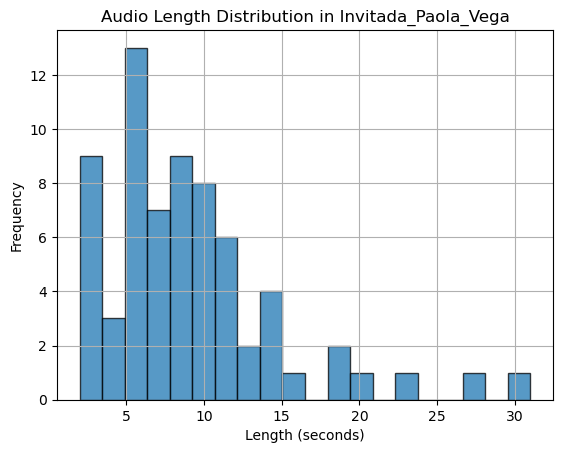

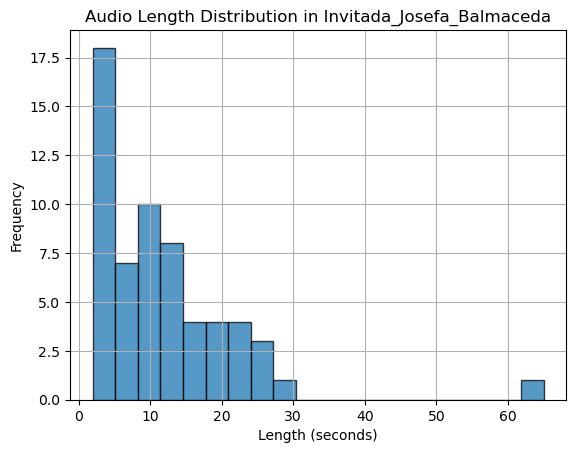

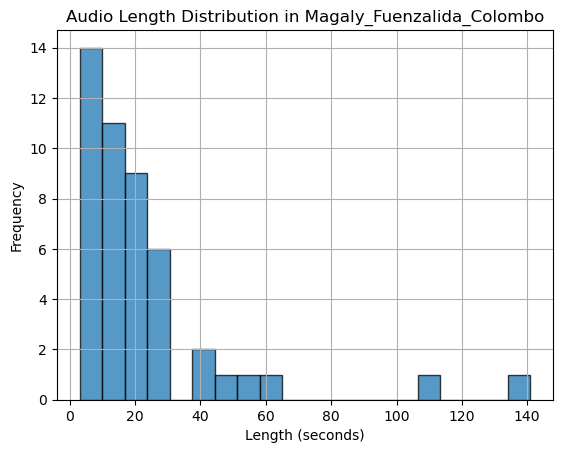

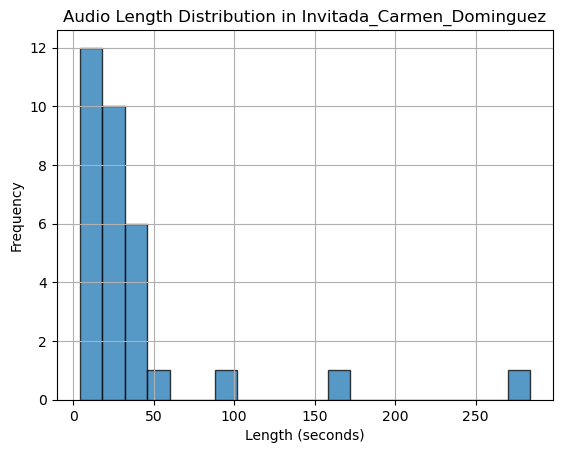

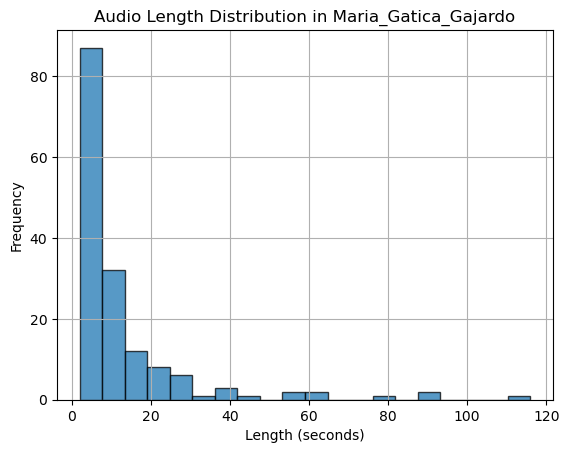

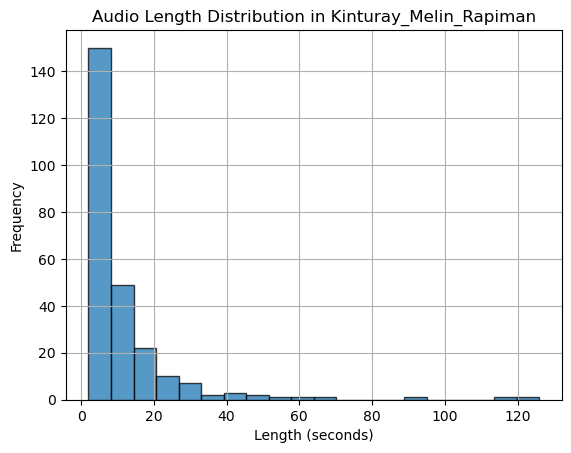

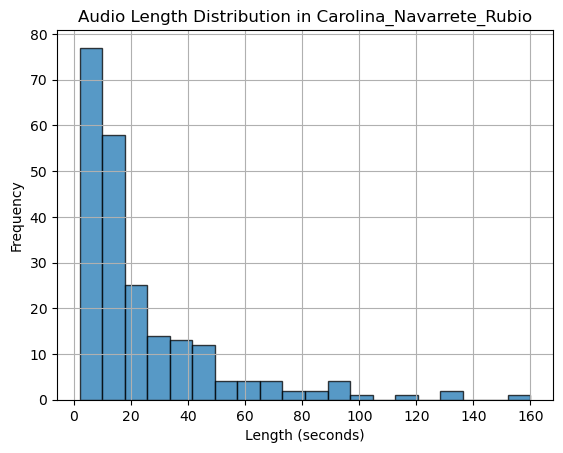

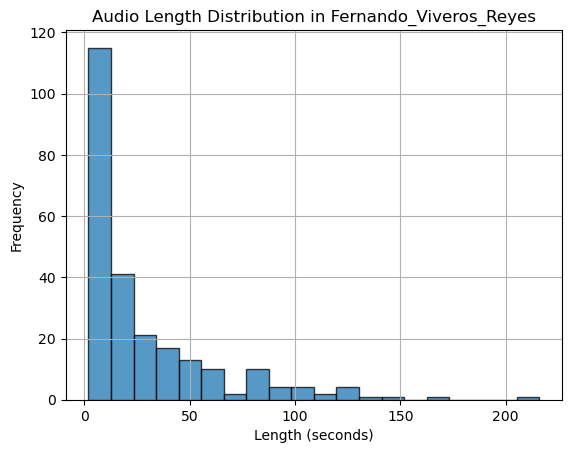

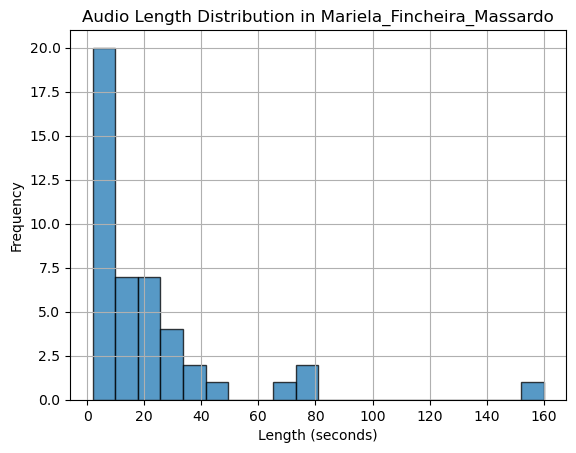

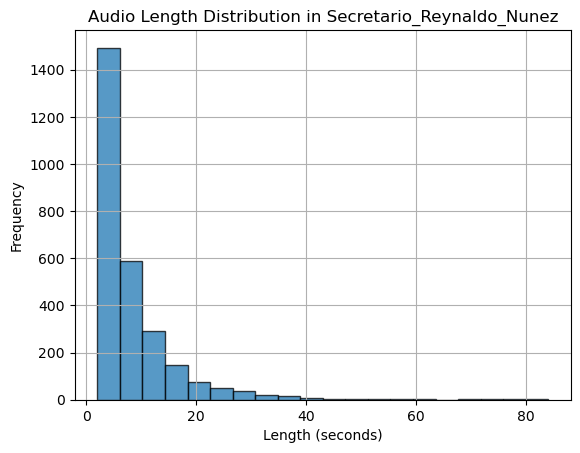

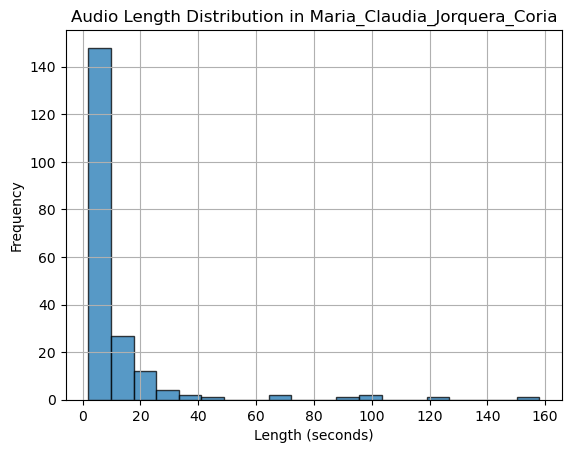

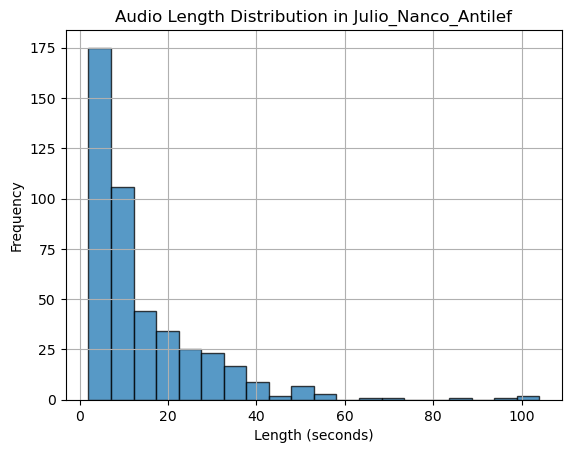

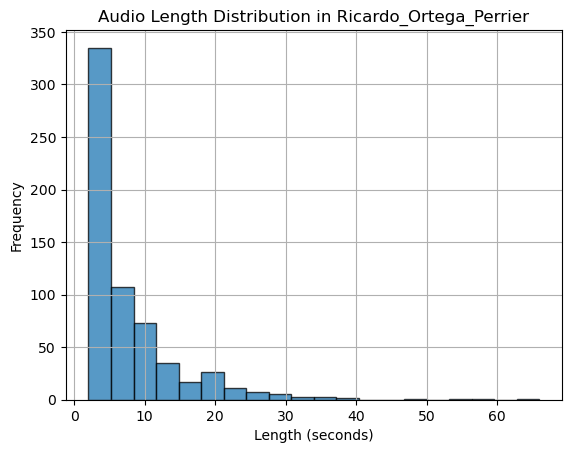

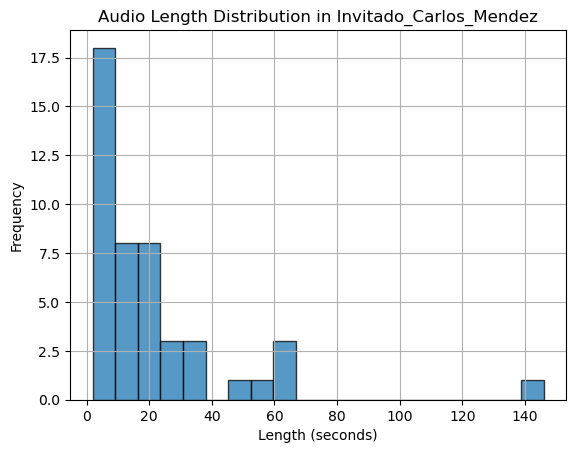

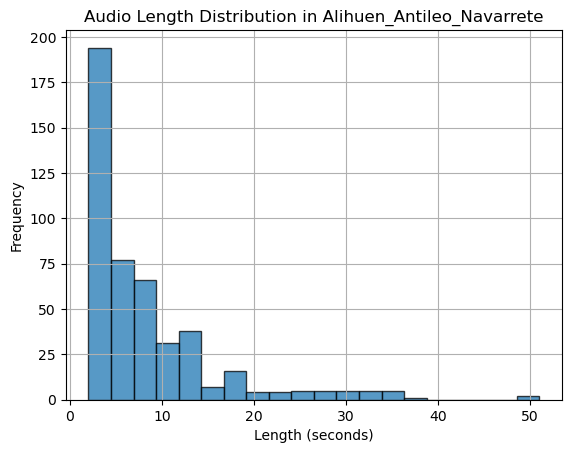

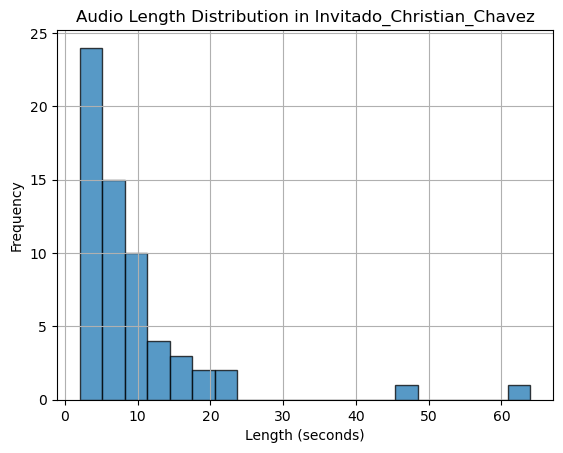

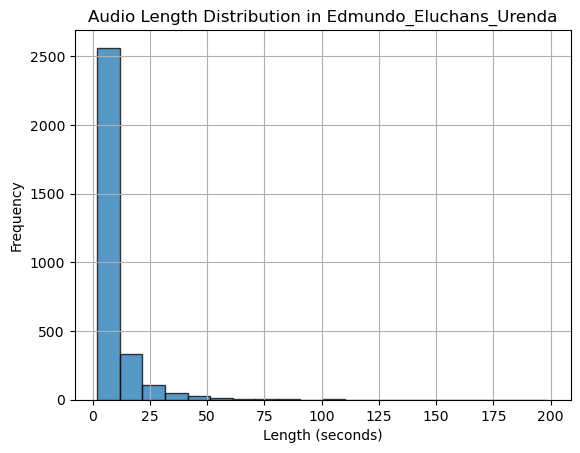

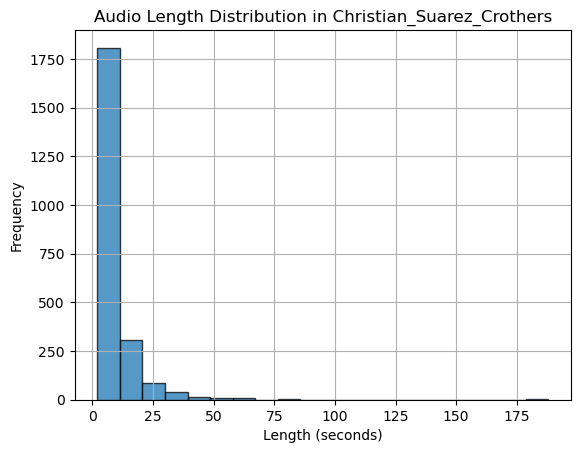

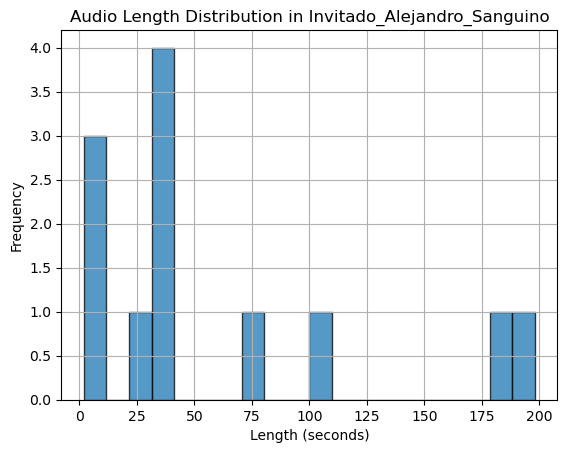

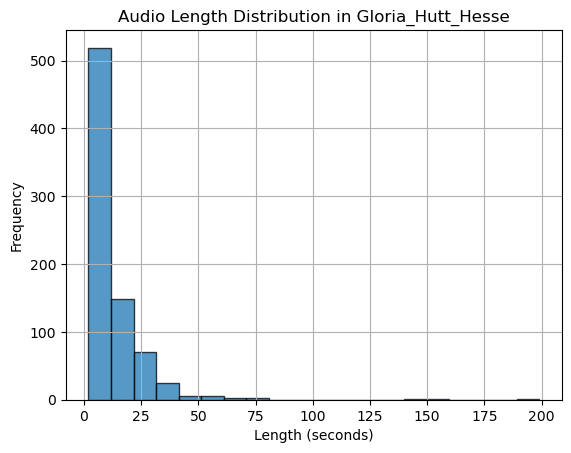

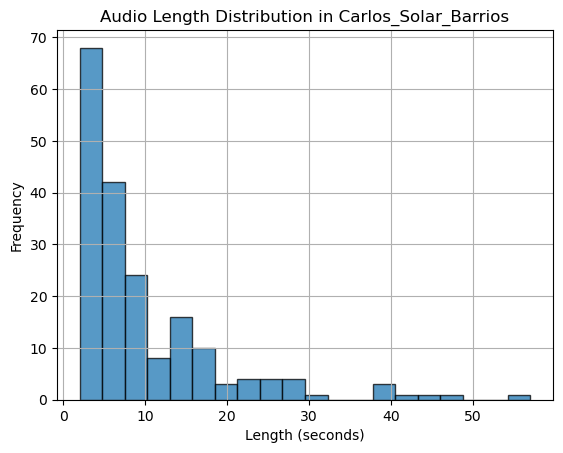

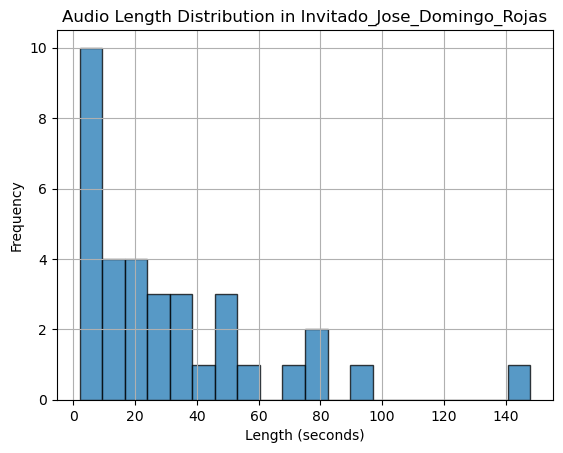

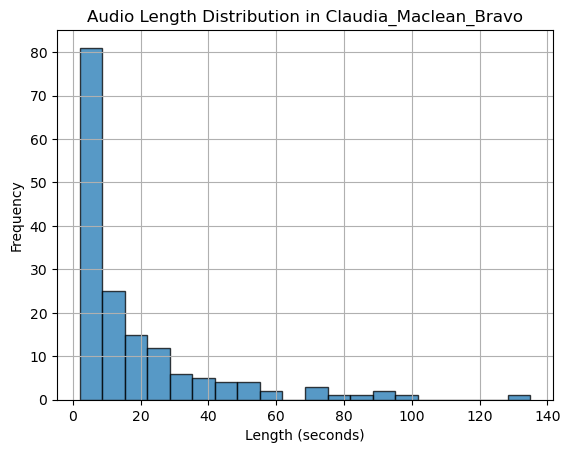

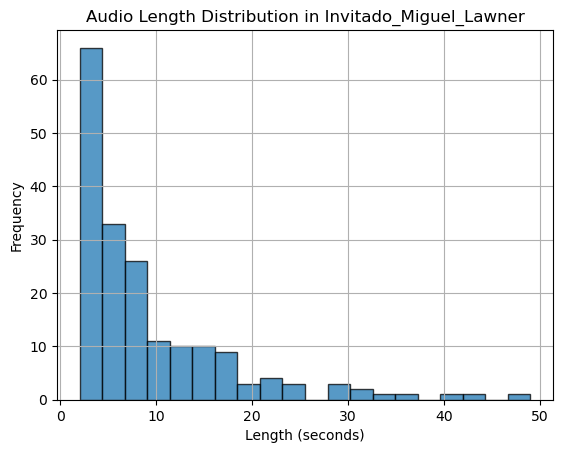

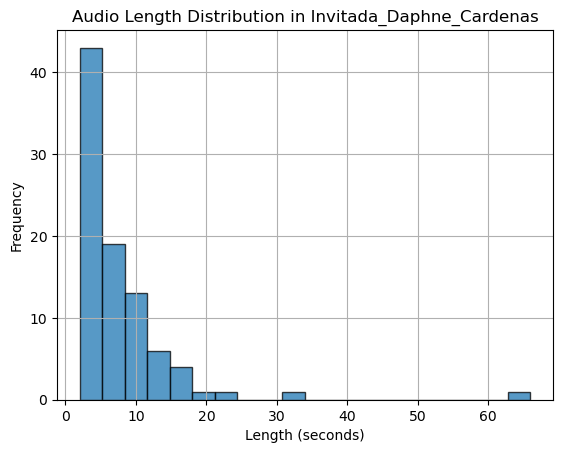

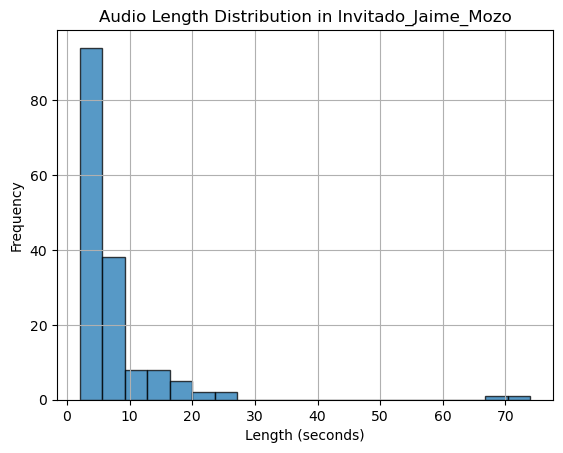

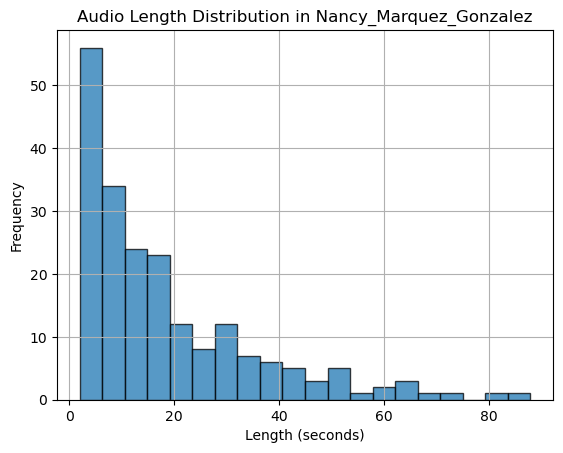

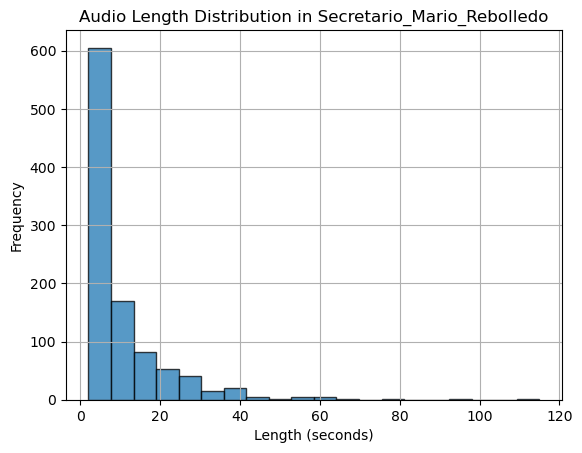

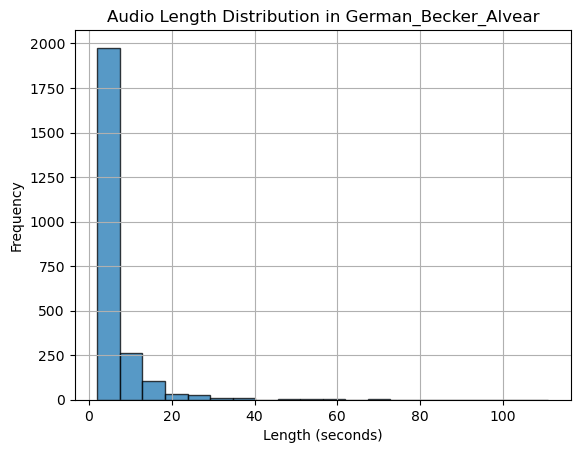

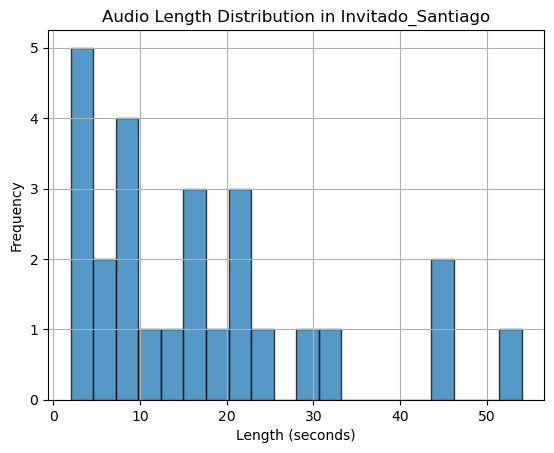

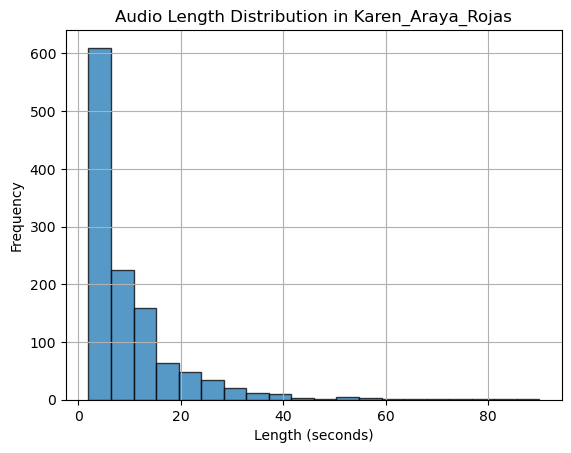

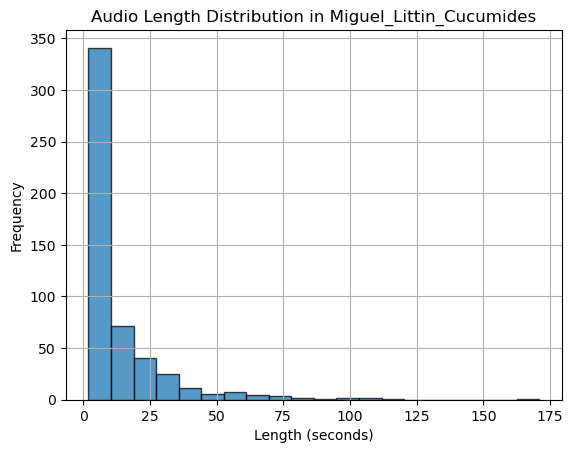

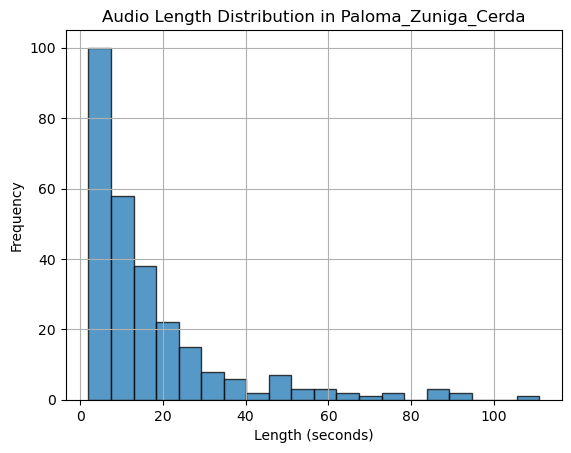

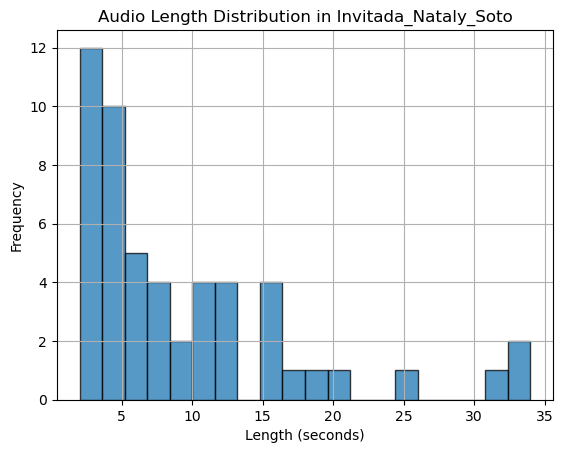

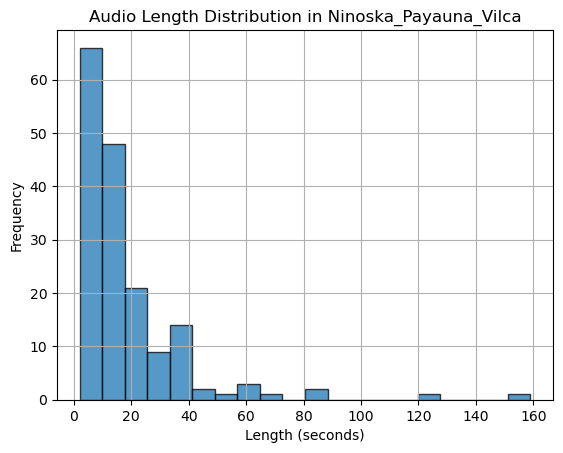

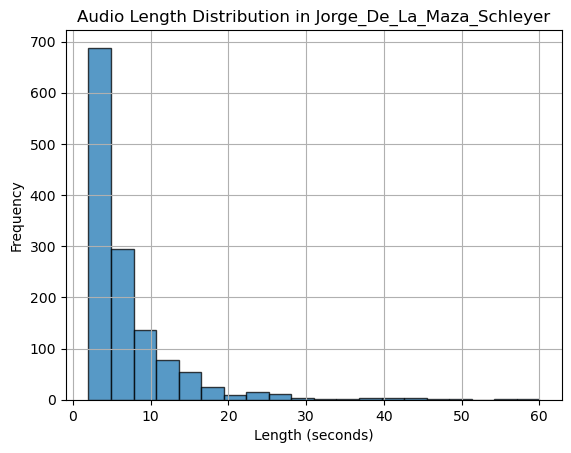

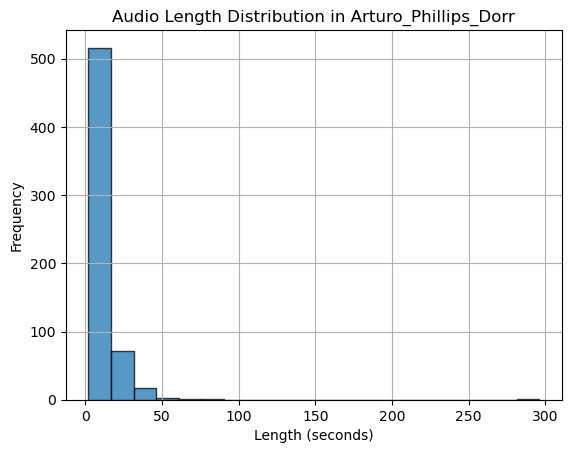

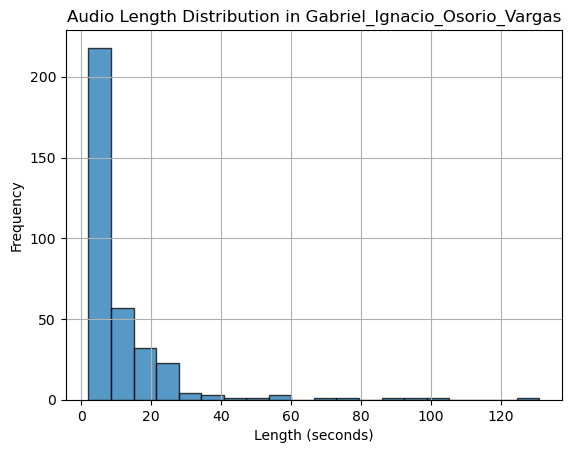

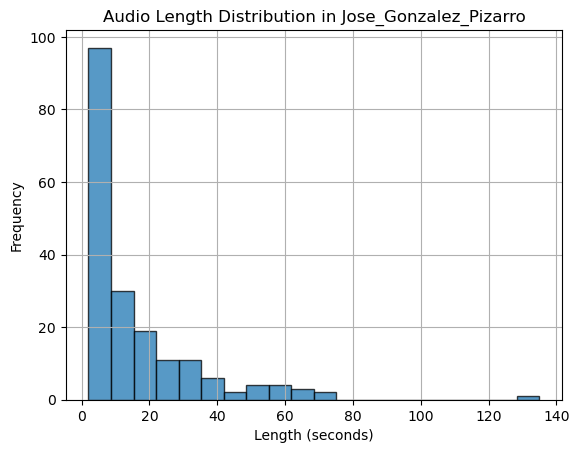

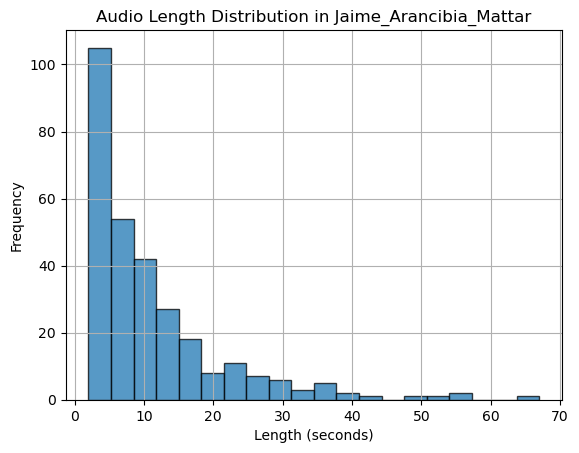

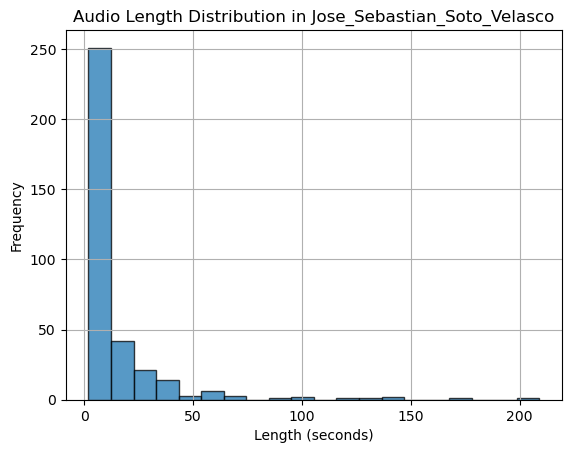

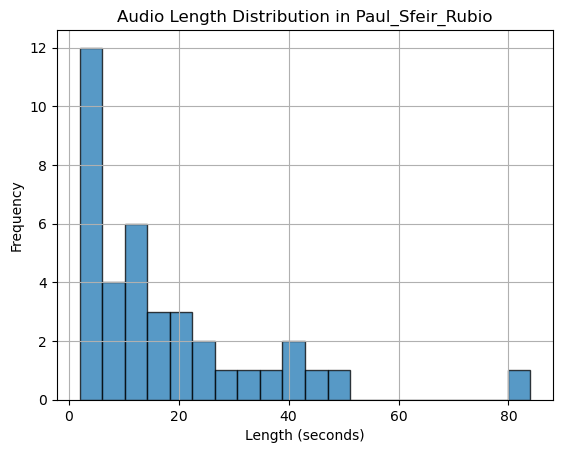

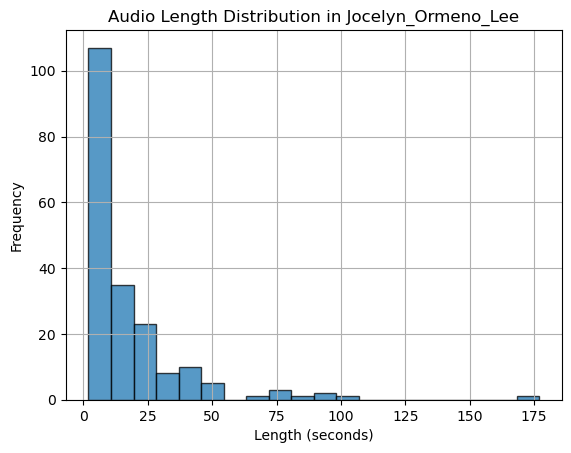

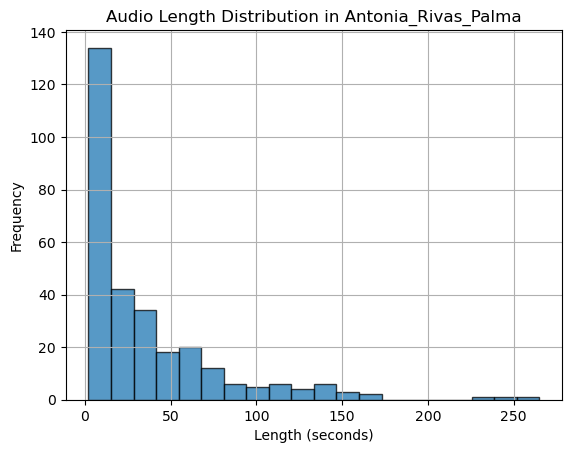

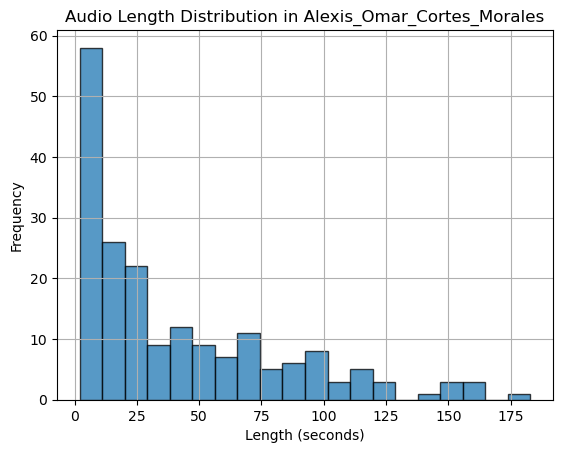

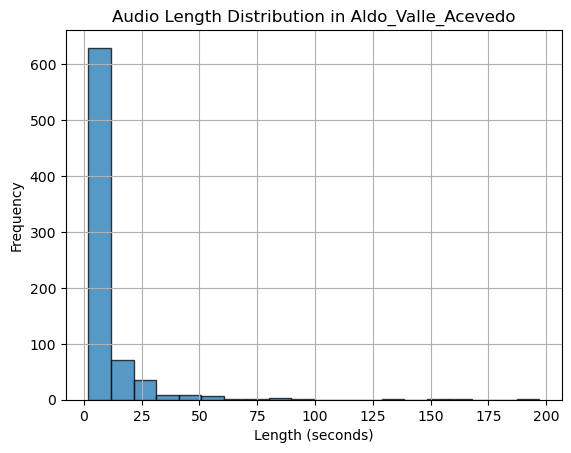

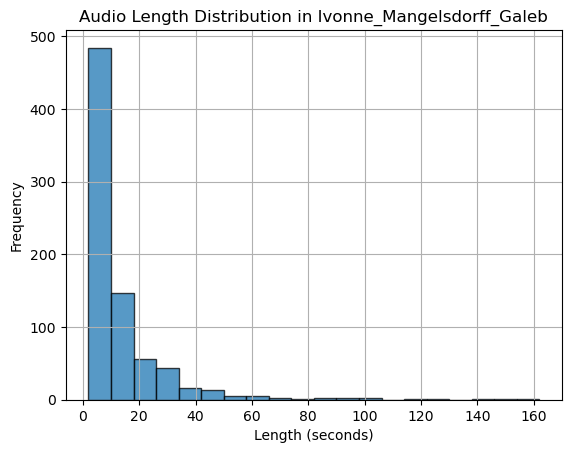

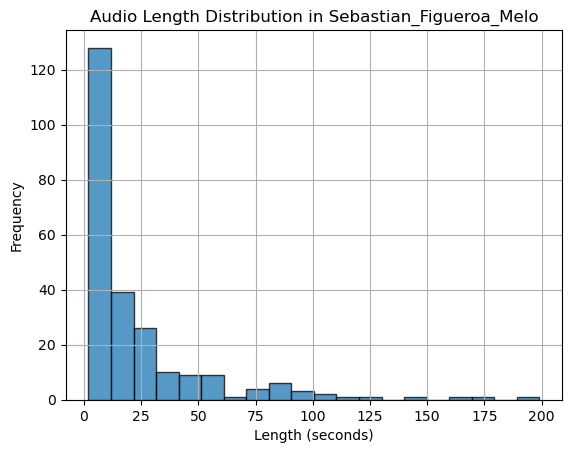

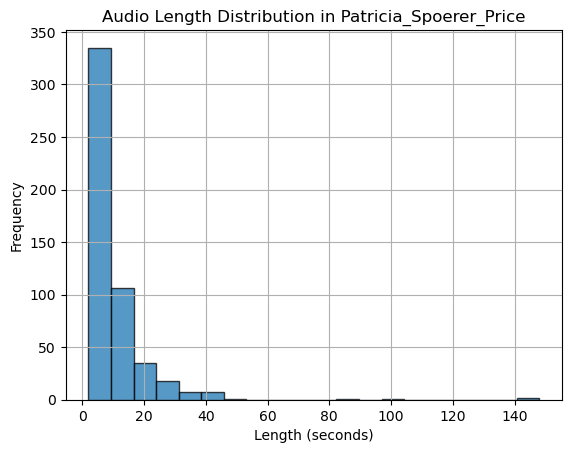

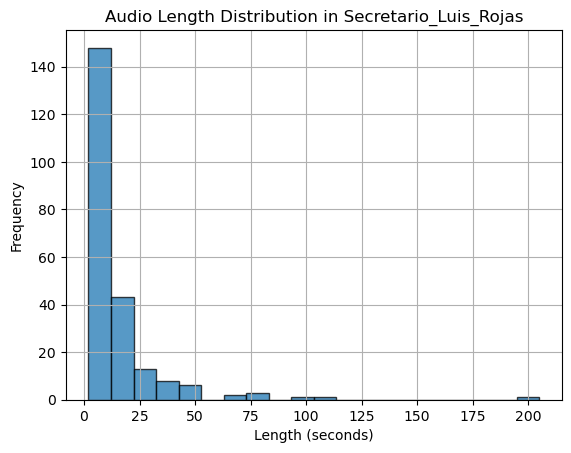

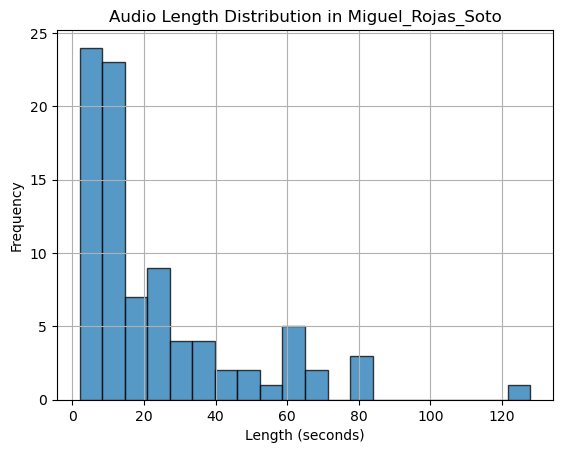

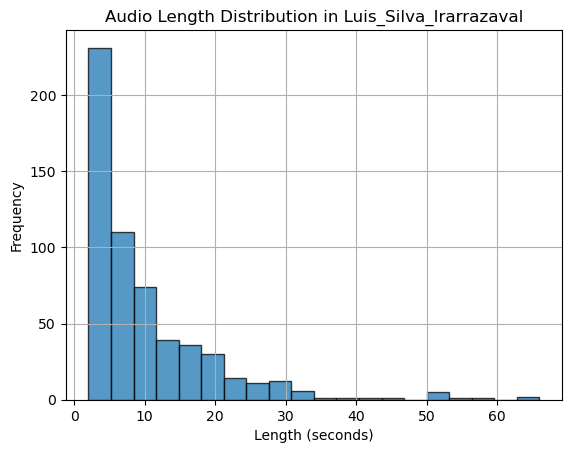

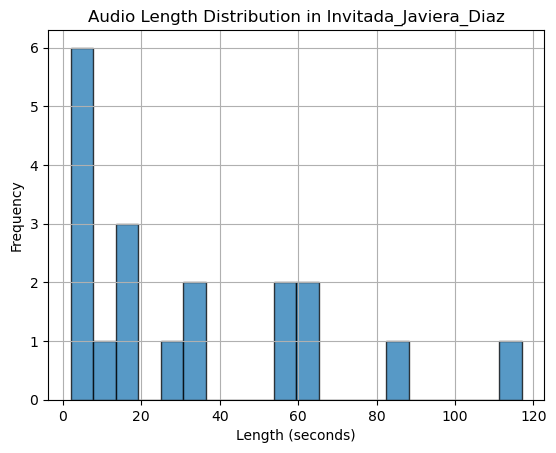

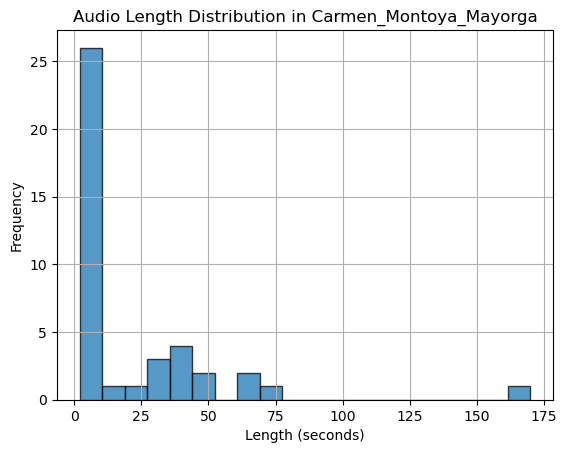

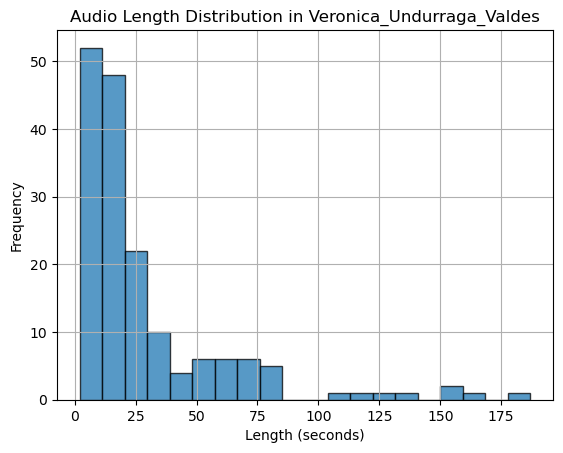

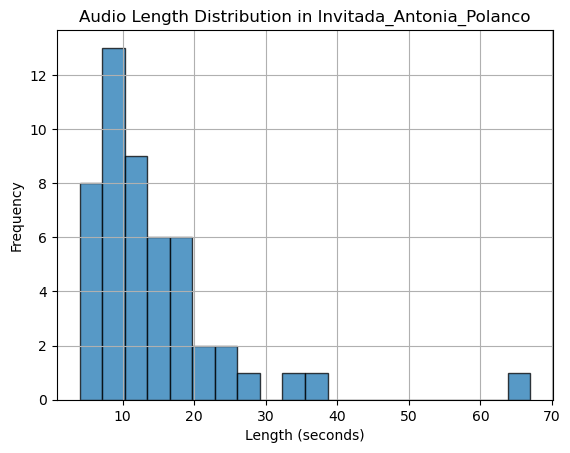

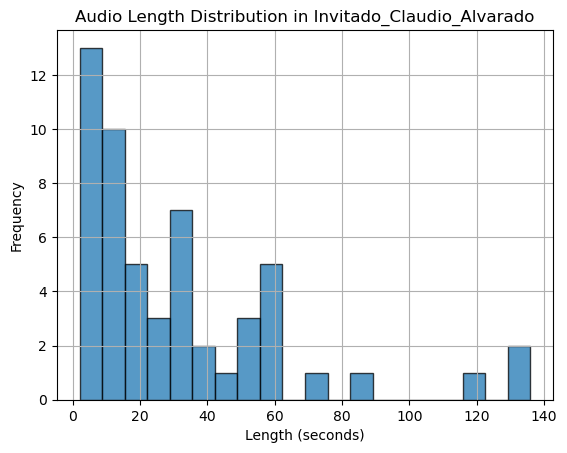

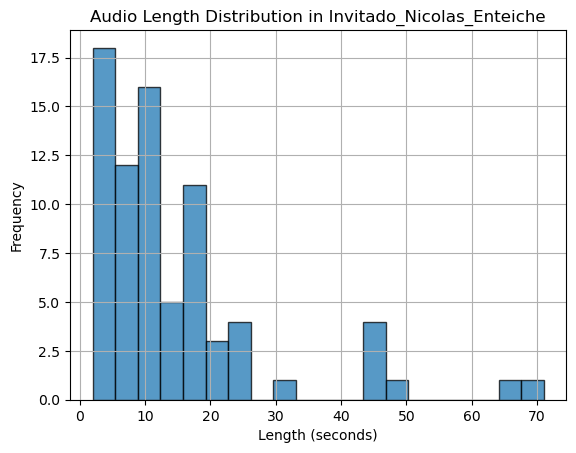

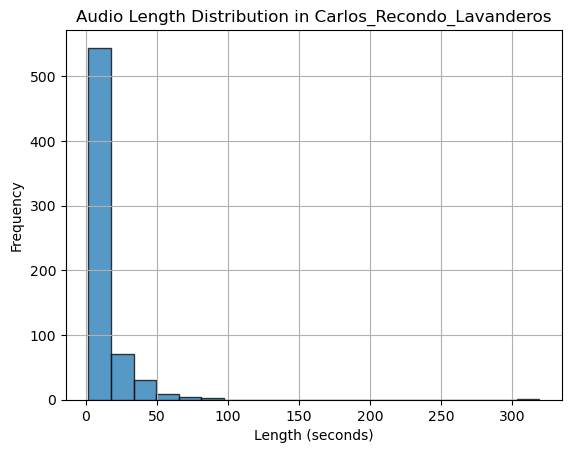

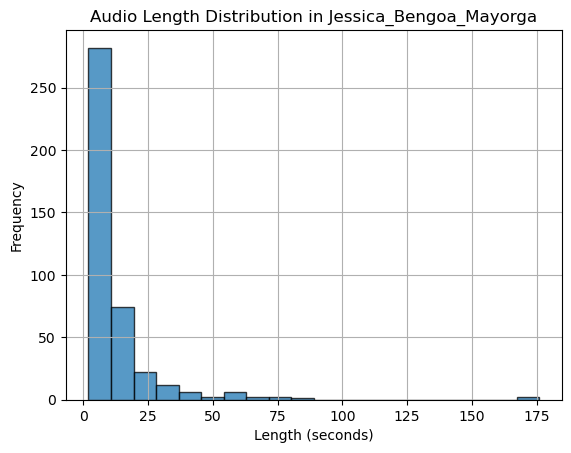

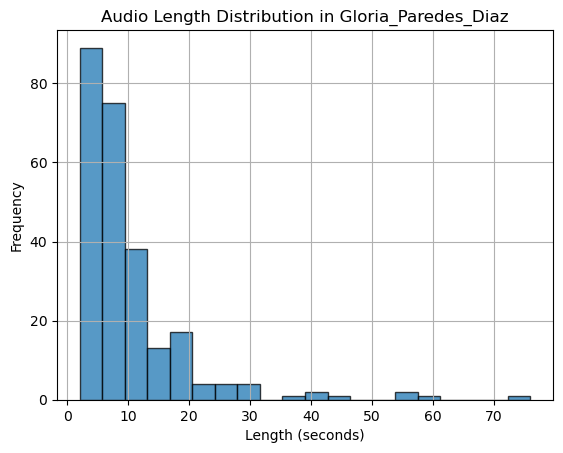

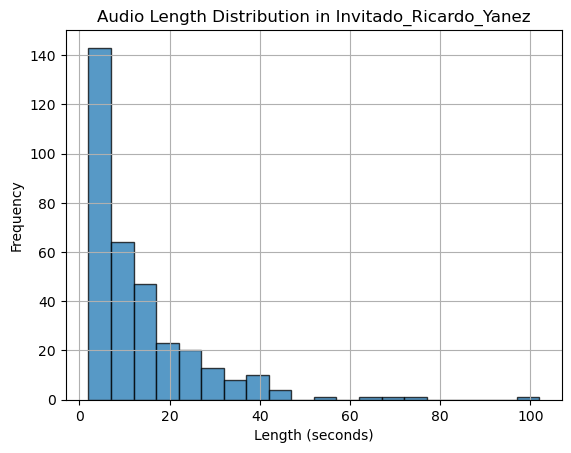

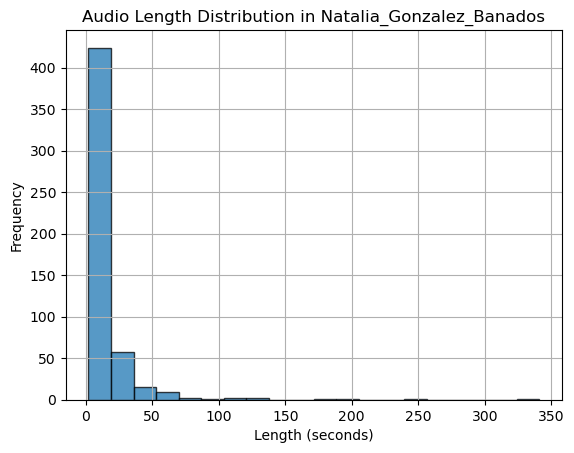

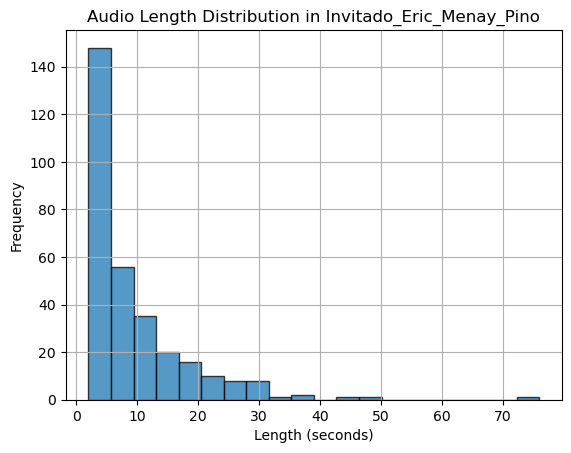

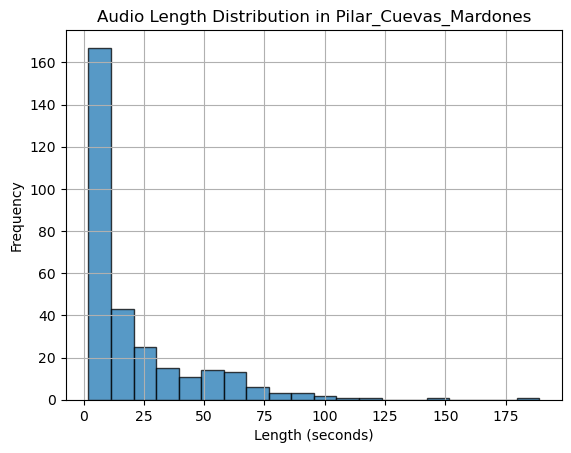

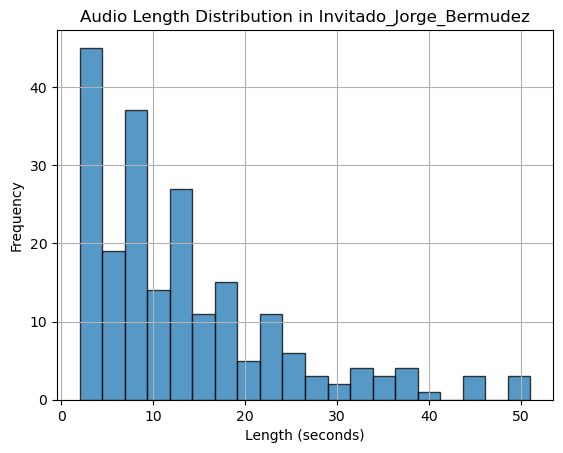

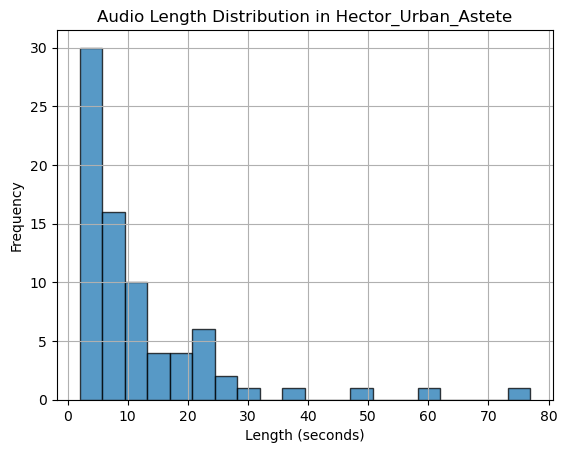

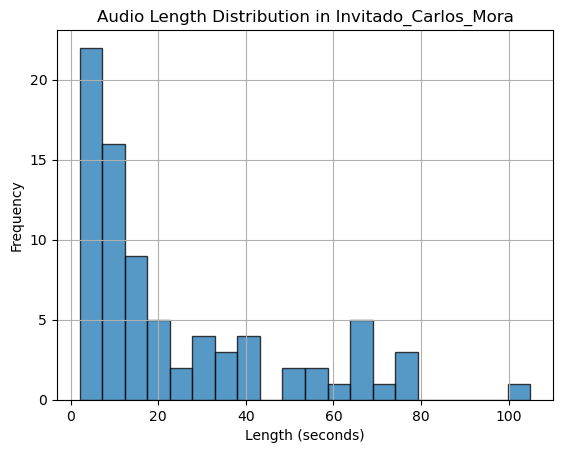

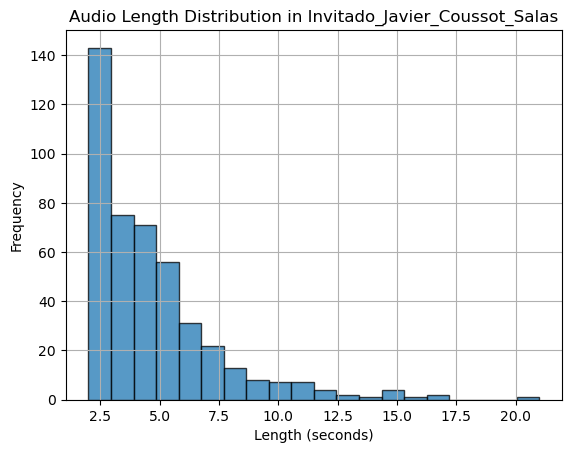

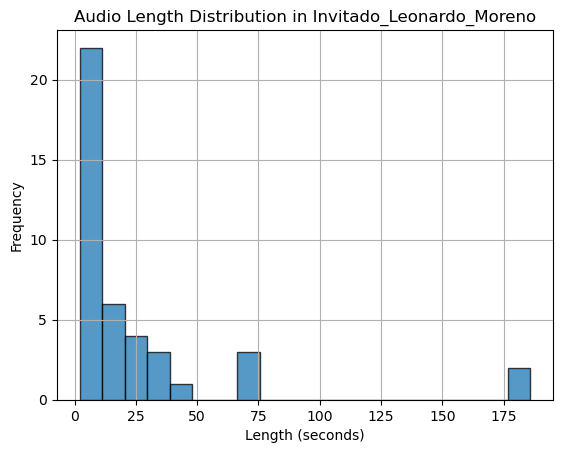

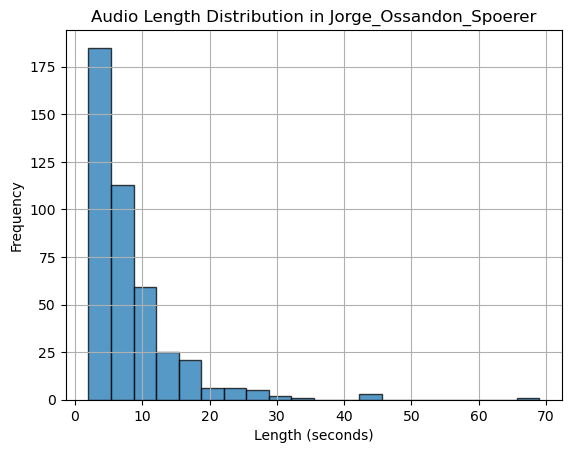

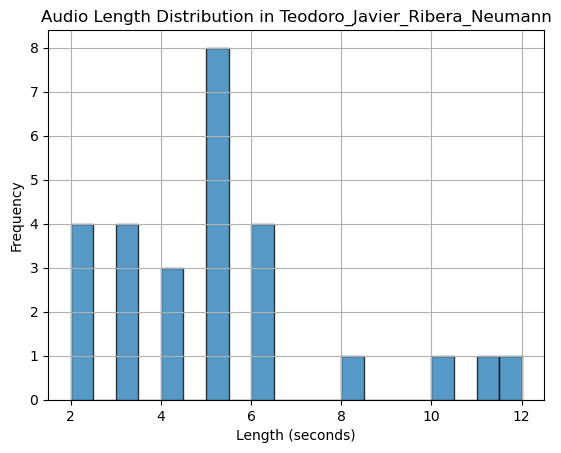

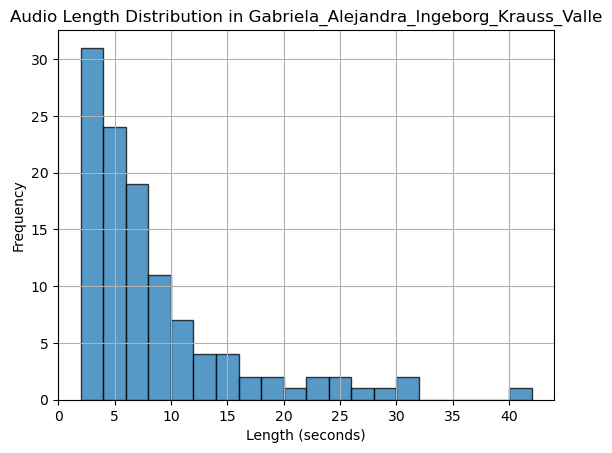

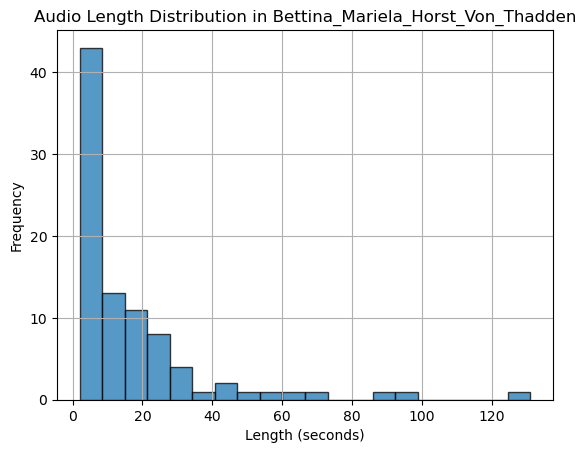

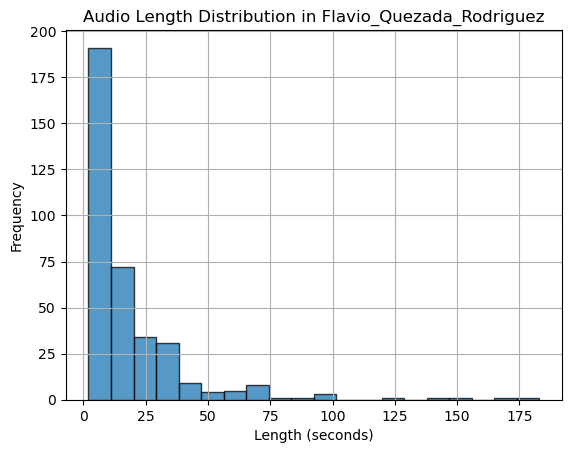

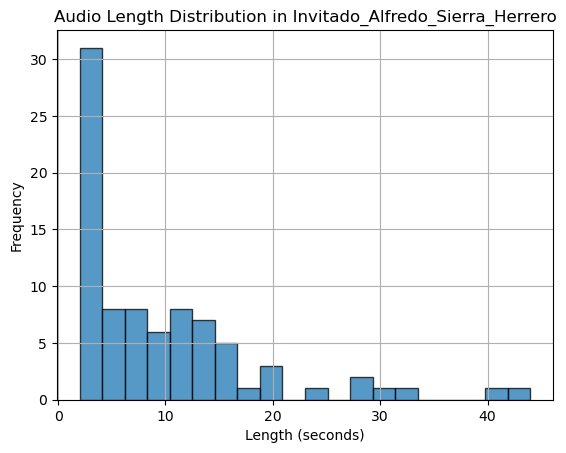

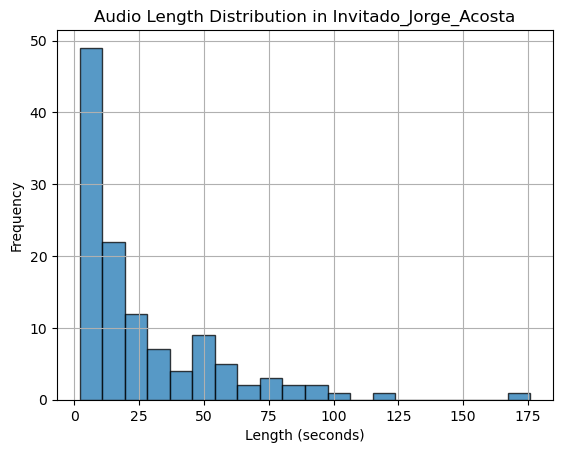

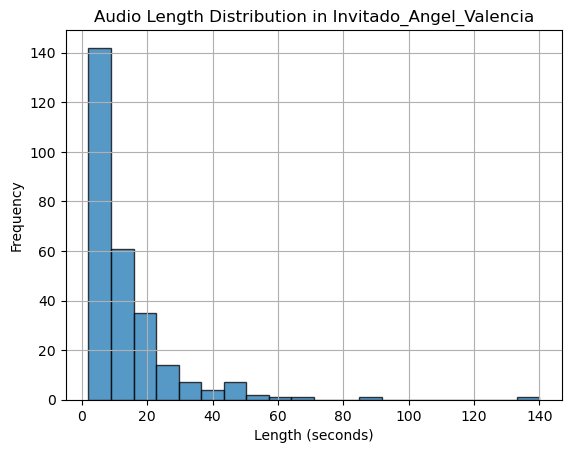

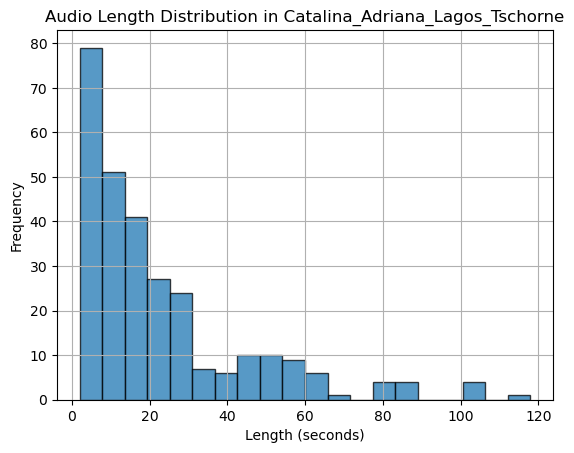

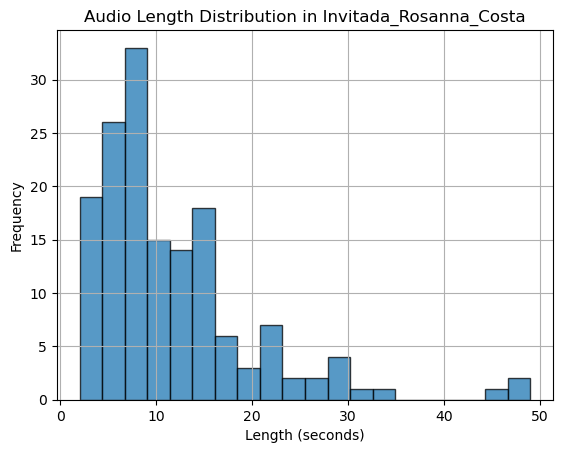

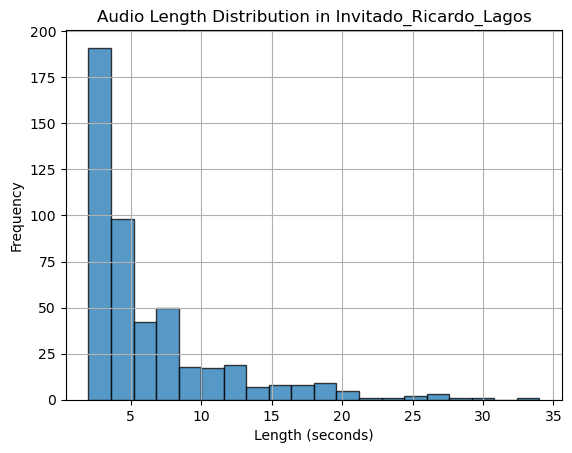

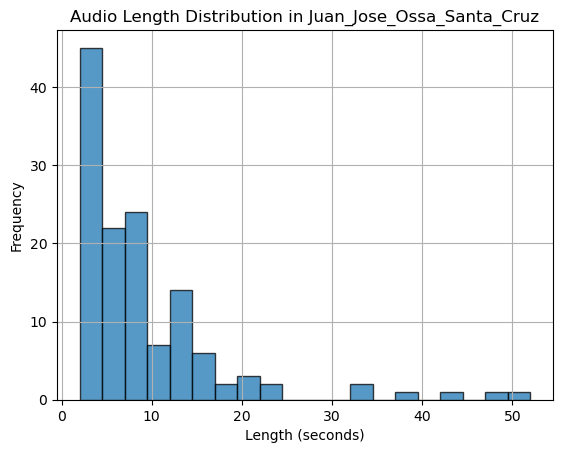

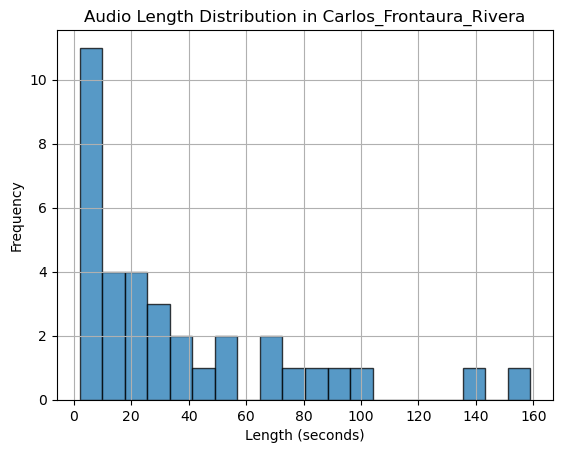

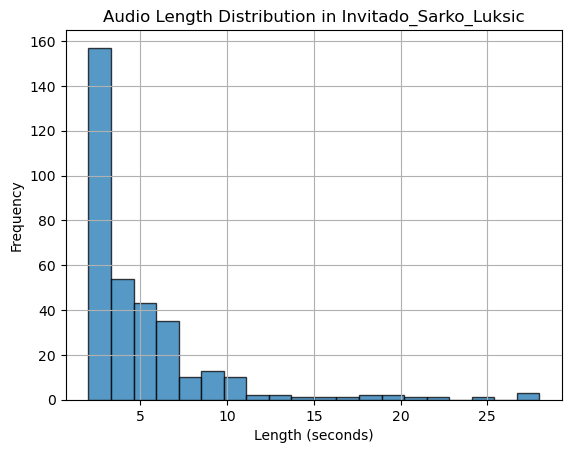

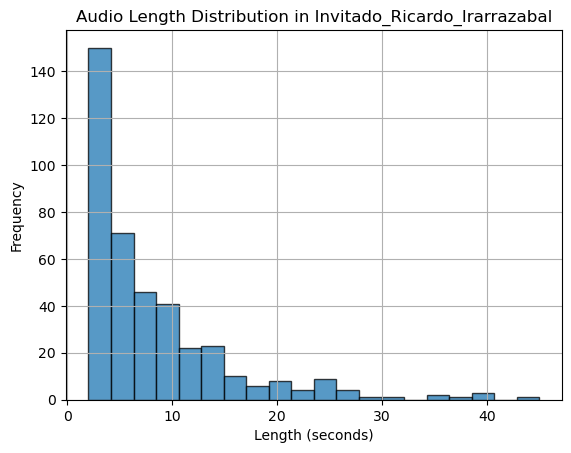

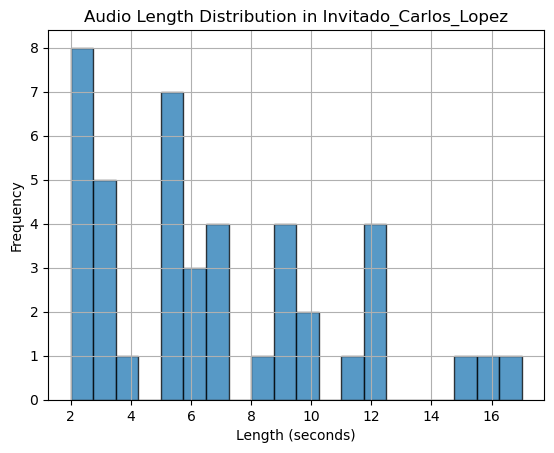

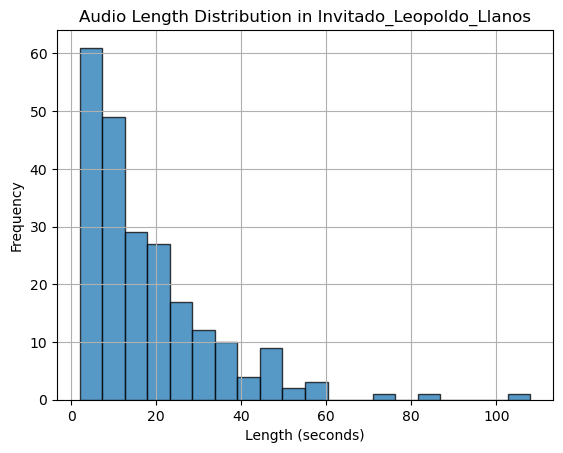

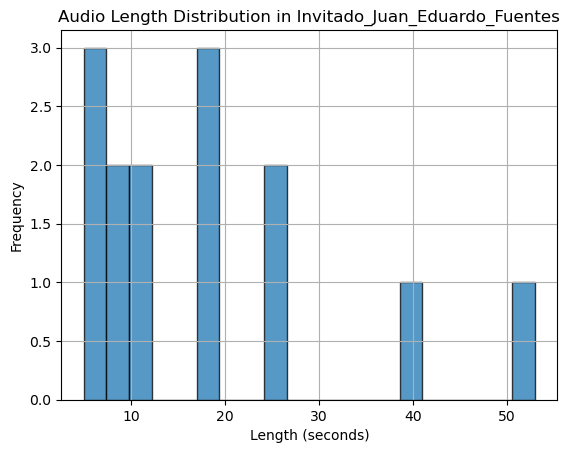

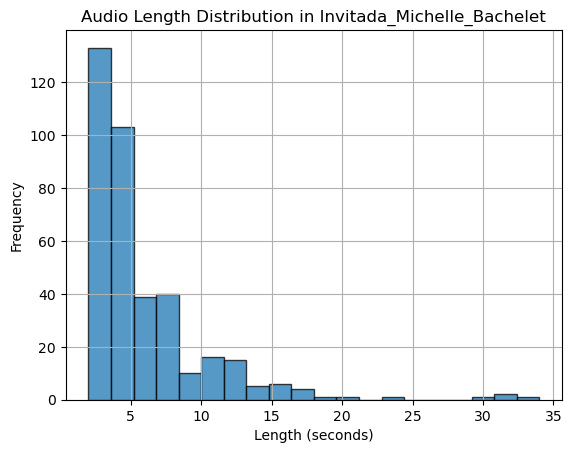

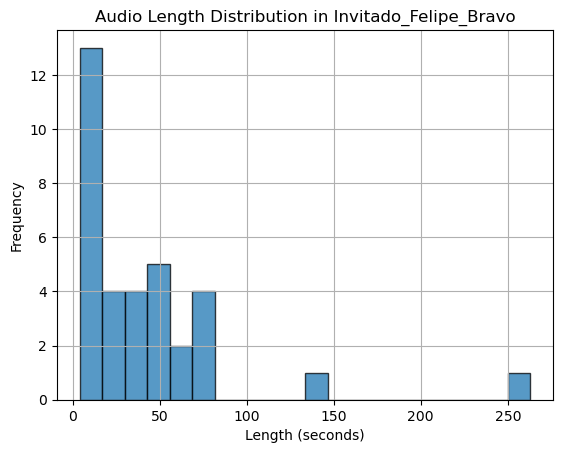

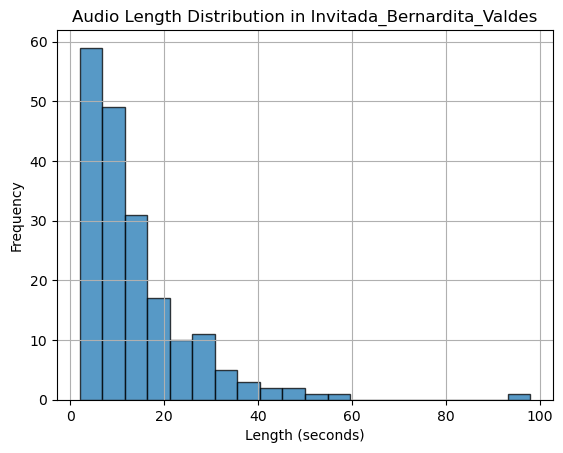

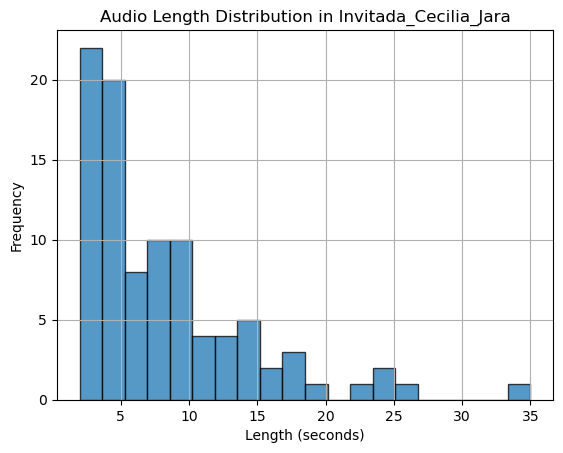

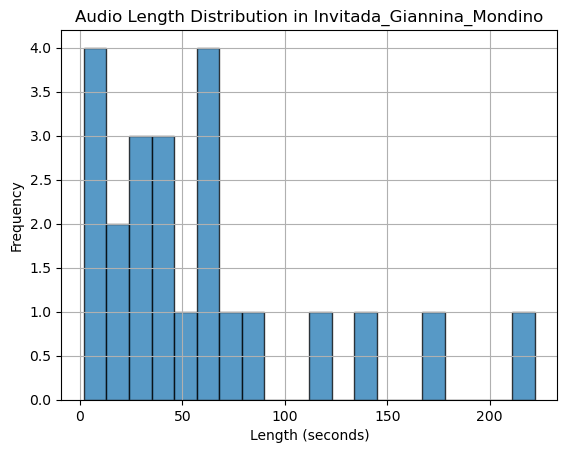

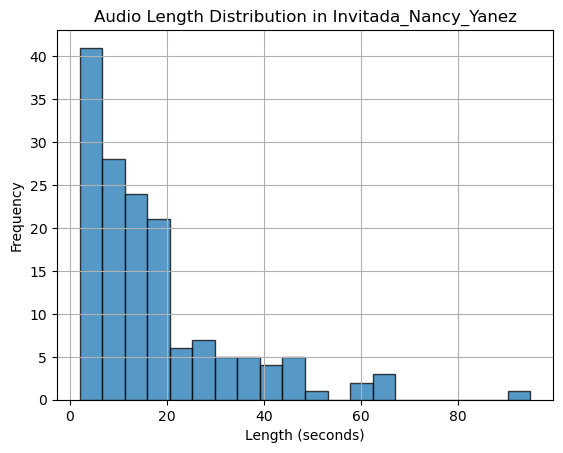

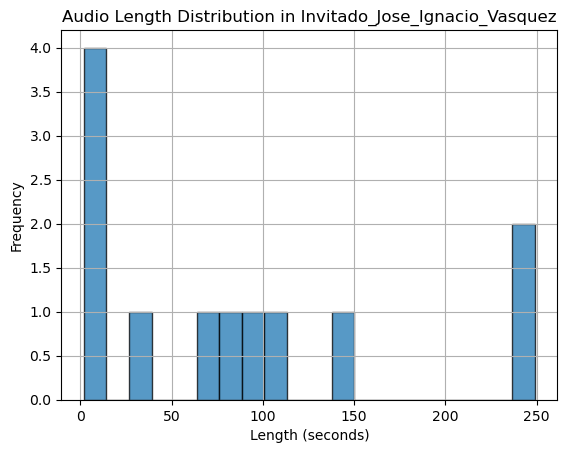

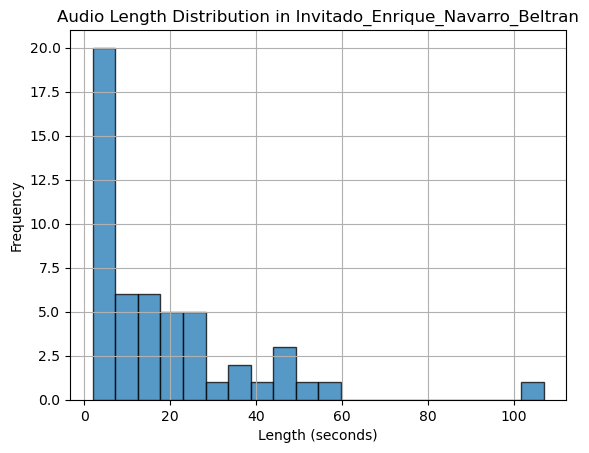

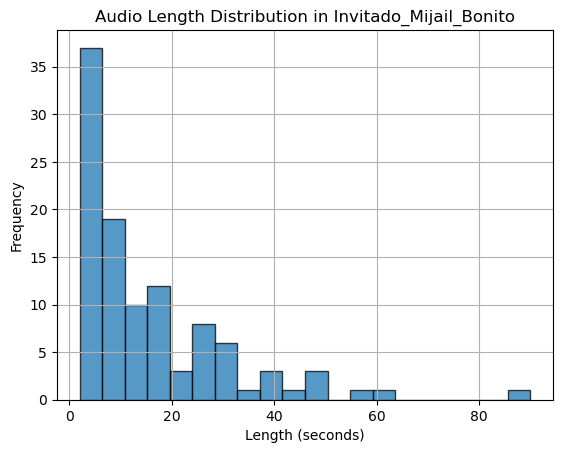

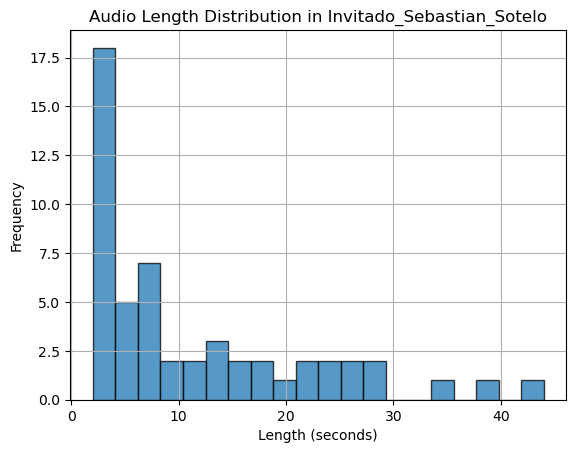

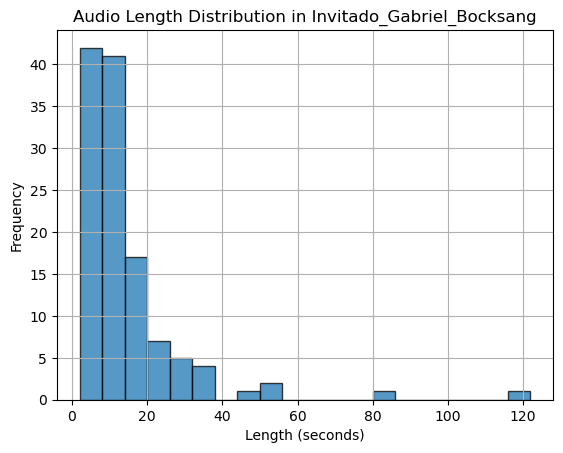

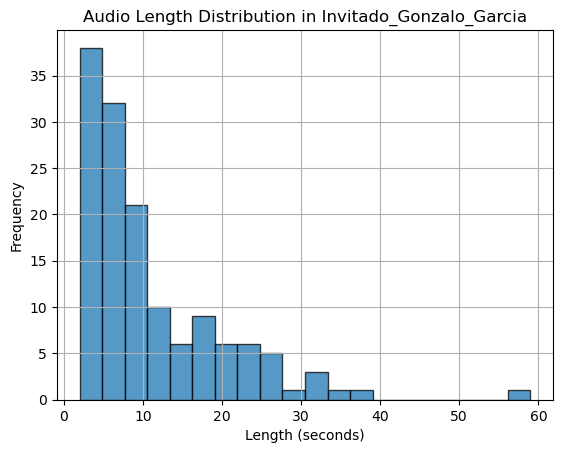

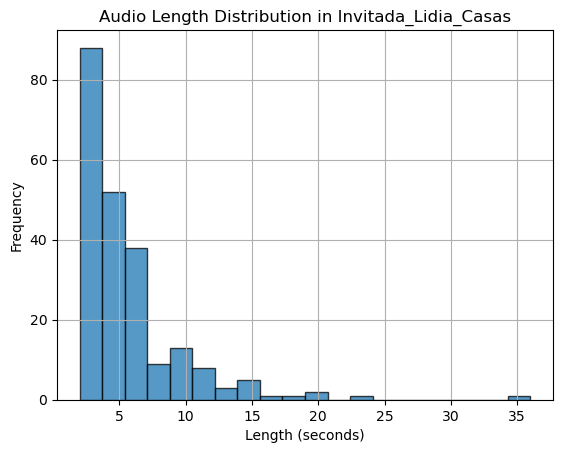

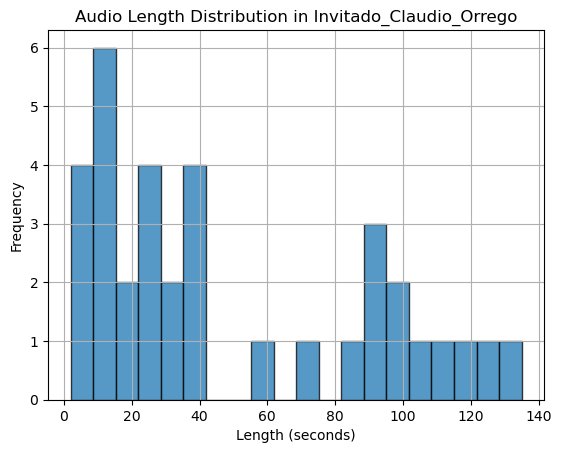

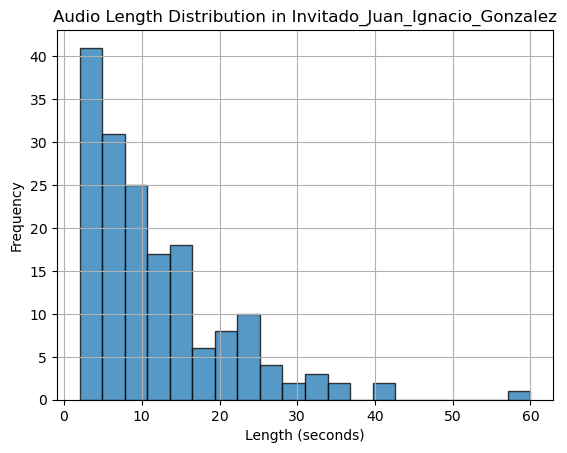

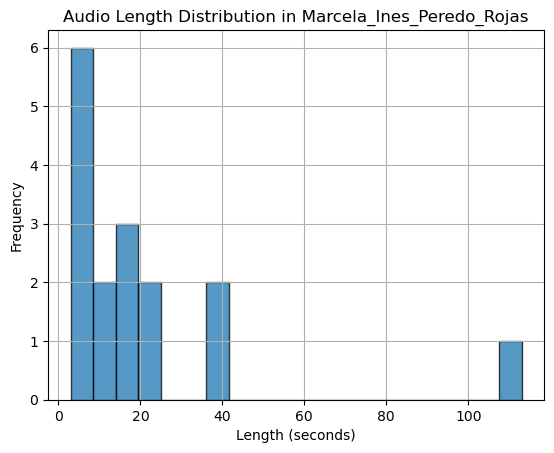

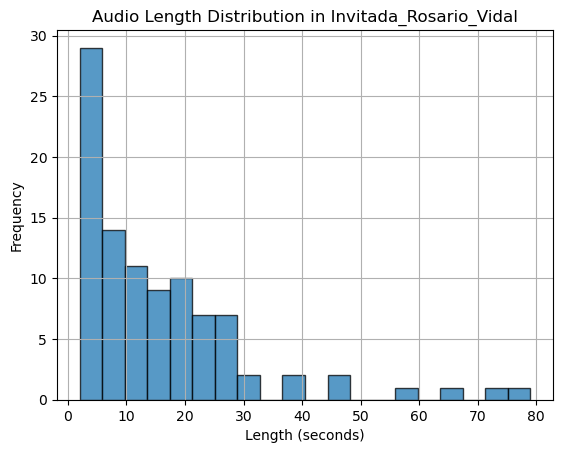

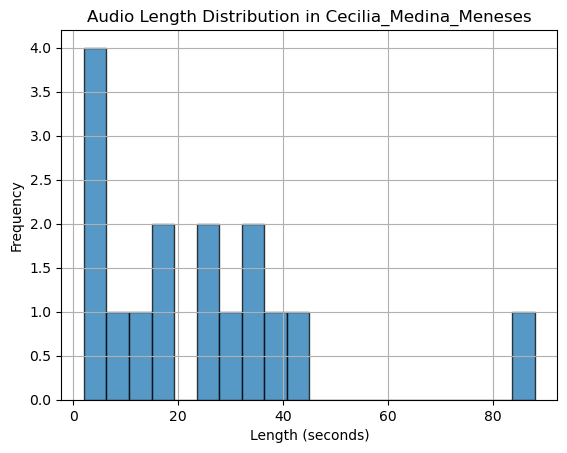

In [2]:
# Root directory containing subfolders with audio files
root_dir = '/home/edu/data/datasets/PCCh23'

# Get the distribution of audio lengths
distribution = get_audio_length_distribution(root_dir)

# Plot the distribution for each subfolder
plot_distribution(distribution)